In [371]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import re
from time import time
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize

from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
import transformers
from transformers import AutoTokenizer,TFDistilBertModel, DistilBertConfig
from transformers import TFAutoModel

In [372]:
!pip install tensorflow

In [373]:
import tensorflow as tf
tf.__version__

'2.11.0'

In [374]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [375]:
!pip install transformers

In [376]:
#folder_path = os.path.abspath("C:/Users/rkhatkar.XCALIBERINFOTEC/OneDrive - Xcaliber Infotech/Desktop")
released = pd.read_excel(r"C:\Users\PShukla\Downloads\VW_CTDI_OrderHolds_Released_22_02_2023latest.xlsx")

In [377]:
released.head()

,ctdiOrderHoldsId,holdType,serviceLine,serviceRequest,partNBR,customer,systemEngineer,daysOnHold,holdCode,holdIssue,resolutionCode,resolutionResponse,startTime,endTime,insertDateTime,fileName,createdBy
0,2,PROCUREMENT,ATTATMIS+,IP22067957,XDC1001U,CISCO SYSTEMS,DL-InventoryMgt@list.att.com,8,MFG Part # Missing,XDC1001U - QTY.1 NO PART AVAILABLE,MFG PART # PROVIDED,part provided,2022-08-11T12:52:06-05:00,2022-08-19T12:36:40-05:00,"2/12/2023, 10:58:53 AM",ctdi_order_holds_08192022130343_decrypt.csv,EC2AMAZ-T2KLKUH\Administrator
1,3,PROCUREMENT,ATTATMIS+,R010025352,XDCLHSMD,NaN,DL-InventoryMgt@list.att.com,11,MFG Part # Missing,XDCLHSMD_x000d_\nQTY 1_x000d_\n_x000d_\nPLEASE...,MFG PART # PROVIDED,PART PROVIDED,2022-08-01T10:47:30-05:00,2022-08-12T14:04:53-05:00,"2/12/2023, 10:58:53 AM",ctdi_order_holds_08122022150353_decrypt.csv,EC2AMAZ-T2KLKUH\Administrator
2,4,PROCUREMENT,ATTMISMTCE,R010025332,GLC-TE,CISCO SYSTEMS,DL-InventoryMgt@list.att.com,13,MFG Part # Missing,GLC-TE_x000d_\nQTY 1_x000d_\n_x000d_\nPLEASE P...,MFG PART # PROVIDED,PART PROVIDED,2022-07-28T13:57:47-05:00,2022-08-10T13:38:23-05:00,"2/12/2023, 10:58:53 AM",ctdi_order_holds_08102022140403_decrypt.csv,EC2AMAZ-T2KLKUH\Administrator
3,5,PROCUREMENT,ATTSIGEU,AVTS220715111126,ISE1075,Custom Cable,DL-InventoryMgt@list.att.com,3,MFG Part # Missing,ISE1079_x000d_\nISE1076_x000d_\nISE1075_x000d_...,MFG PART # PROVIDED,"please use from these below from NCRTRANSFER, ...",2022-07-29T13:05:30-05:00,2022-08-01T13:08:29-05:00,"2/12/2023, 10:58:53 AM",ctdi_order_holds_08012022140403_decrypt.csv,EC2AMAZ-T2KLKUH\Administrator
4,6,PROCUREMENT,ATTSIGEU,AVTS220715111126,ISE1076,Custom Cable,DL-InventoryMgt@list.att.com,3,MFG Part # Missing,ISE1079_x000d_\nISE1076_x000d_\nISE1075_x000d_...,MFG PART # PROVIDED,"please use from these below from NCRTRANSFER, ...",2022-07-29T13:05:30-05:00,2022-08-01T13:08:29-05:00,"2/12/2023, 10:58:53 AM",ctdi_order_holds_08012022140403_decrypt.csv,EC2AMAZ-T2KLKUH\Administrator


In [378]:
released.shape

(1691, 17)

In [379]:
released.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ctdiOrderHoldsId    1691 non-null   int64 
 1   holdType            1691 non-null   object
 2   serviceLine         1691 non-null   object
 3   serviceRequest      1691 non-null   object
 4   partNBR             1691 non-null   object
 5   customer            1622 non-null   object
 6   systemEngineer      1691 non-null   object
 7   daysOnHold          1691 non-null   int64 
 8   holdCode            1691 non-null   object
 9   holdIssue           1691 non-null   object
 10  resolutionCode      1691 non-null   object
 11  resolutionResponse  1362 non-null   object
 12  startTime           1691 non-null   object
 13  endTime             1691 non-null   object
 14  insertDateTime      1691 non-null   object
 15  fileName            1691 non-null   object
 16  createdBy           1691

In [380]:
duplicated= released[released.duplicated()]
duplicated.shape

(0, 17)

In [381]:
duplicated.head()

,ctdiOrderHoldsId,holdType,serviceLine,serviceRequest,partNBR,customer,systemEngineer,daysOnHold,holdCode,holdIssue,resolutionCode,resolutionResponse,startTime,endTime,insertDateTime,fileName,createdBy


In [382]:
released.columns

Index(['ctdiOrderHoldsId', 'holdType', 'serviceLine', 'serviceRequest',
       'partNBR', 'customer', 'systemEngineer', 'daysOnHold', 'holdCode',
       'holdIssue', 'resolutionCode', 'resolutionResponse', 'startTime',
       'endTime', 'insertDateTime', 'fileName', 'createdBy'],
      dtype='object')

In [383]:
final_df=released[['holdCode','holdIssue','resolutionCode']]

In [384]:
final_df.shape

(1691, 3)

In [385]:
final_df['resolutionCode'].nunique()

22

In [386]:
final_df['resolutionCode'].unique()

array(['MFG PART # PROVIDED', 'MFG PRT# UPDATED', 'ACK PROVIDED',
       'PO PROVIDED', 'HOLD IGNORE', 'MFG PART #  DELIVERED',
       'HOST NAME ERROR CLEARED', 'UPDATED EOL PROVIDED',
       'CFG FILE PROVIDED', 'UPDATED CFG FILE', 'UPDATED SDP FILE',
       'RCD REVISED CI', 'OTHER', 'SDP & CFG FILE PROVIDED',
       'IOS PROVIDED', 'HOST NAME PROVIDED', 'SDP FILE PROVIDED',
       'UPDATED IOS', 'UPDATED SDP&CFG FILE', 'ORDER CANCELLED',
       'ACK UPDATED', 'MORE INFORMATION NEEDED'], dtype=object)

In [387]:
final_df['resolutionCode'].unique()

array(['MFG PART # PROVIDED', 'MFG PRT# UPDATED', 'ACK PROVIDED',
       'PO PROVIDED', 'HOLD IGNORE', 'MFG PART #  DELIVERED',
       'HOST NAME ERROR CLEARED', 'UPDATED EOL PROVIDED',
       'CFG FILE PROVIDED', 'UPDATED CFG FILE', 'UPDATED SDP FILE',
       'RCD REVISED CI', 'OTHER', 'SDP & CFG FILE PROVIDED',
       'IOS PROVIDED', 'HOST NAME PROVIDED', 'SDP FILE PROVIDED',
       'UPDATED IOS', 'UPDATED SDP&CFG FILE', 'ORDER CANCELLED',
       'ACK UPDATED', 'MORE INFORMATION NEEDED'], dtype=object)

In [388]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   holdCode        1691 non-null   object
 1   holdIssue       1691 non-null   object
 2   resolutionCode  1691 non-null   object
dtypes: object(3)
memory usage: 39.8+ KB


In [389]:
print("Number of missing values:", final_df.isnull().sum().sum())

Number of missing values: 0


In [390]:
print("Number of missing values:", final_df[['holdCode','holdIssue']].isnull().sum().sum())

Number of missing values: 0


In [391]:
print("Number of missing values:", final_df[['resolutionCode']].isnull().sum().sum())

Number of missing values: 0


In [392]:
# remove records which does not having any resolution code
final_df=final_df[final_df['resolutionCode'].isnull()==False]

In [393]:
final_df.shape
#78 records does not having any resolution code 

(1691, 3)

### Data Analysis and Preprocessing

In [394]:
final_df['holdCode'].unique()

array(['MFG Part # Missing', 'ACK Missing', 'PO Missing',
       'Host Name Error', 'EOL No Match', 'CFG Error', 'SDP Error',
       'CTDI WAITING REVISED CI', 'SDP & CFG Missing', 'CFG Missing',
       'IOS Error', 'IOS Missing', 'SDP Missing', 'SDP & CFG Error',
       'OTHER', 'Host Name Missing', 'AT&T Hold', 'ACK Error',
       'MFG Part # Error', 'MFG Part # Not Delivered'], dtype=object)

<AxesSubplot:>

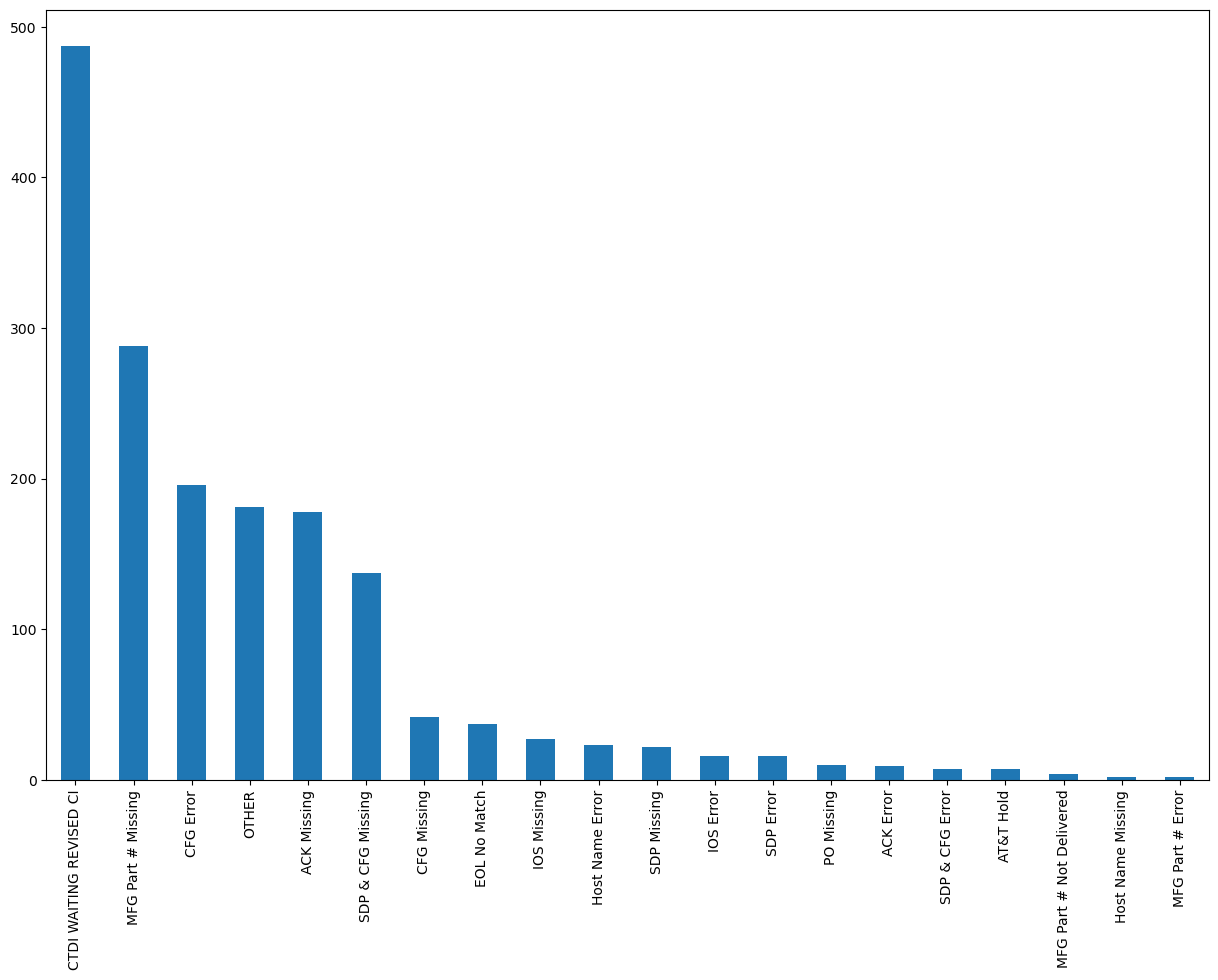

In [395]:
released['holdCode'].value_counts().plot(kind = 'bar' , figsize= (15,10))

In [396]:
data=final_df.groupby(['holdCode'])['holdIssue','resolutionCode'].count().sort_values(by='holdIssue', ascending=False)
data=data.reset_index(level=['holdCode'])
data

C:\Users\PShukla\AppData\Local\Temp\ipykernel_15936\2828481487.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data=final_df.groupby(['holdCode'])['holdIssue','resolutionCode'].count().sort_values(by='holdIssue', ascending=False)


,holdCode,holdIssue,resolutionCode
0,CTDI WAITING REVISED CI,487,487
1,MFG Part # Missing,288,288
2,CFG Error,196,196
3,OTHER,181,181
4,ACK Missing,178,178
5,SDP & CFG Missing,137,137
6,CFG Missing,42,42
7,EOL No Match,37,37
8,IOS Missing,27,27
9,Host Name Error,23,23


In [397]:
distinct_data=final_df.groupby(['holdCode'])['holdIssue','resolutionCode'].nunique().sort_values(by='holdIssue', ascending=False)
distinct_data=distinct_data.reset_index(level=['holdCode'])
distinct_data

C:\Users\PShukla\AppData\Local\Temp\ipykernel_15936\403766125.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  distinct_data=final_df.groupby(['holdCode'])['holdIssue','resolutionCode'].nunique().sort_values(by='holdIssue', ascending=False)


,holdCode,holdIssue,resolutionCode
0,CFG Error,135,7
1,MFG Part # Missing,130,9
2,CTDI WAITING REVISED CI,29,3
3,EOL No Match,28,5
4,OTHER,25,6
5,SDP & CFG Missing,23,7
6,IOS Missing,18,7
7,SDP Error,16,4
8,CFG Missing,15,2
9,ACK Missing,15,3


In [398]:
unique_names=final_df.loc[final_df['holdCode']=='CFG Error','resolutionCode'].unique()

In [399]:
unique_names

array(['CFG FILE PROVIDED', 'UPDATED CFG FILE', 'UPDATED SDP FILE',
       'OTHER', 'UPDATED EOL PROVIDED', 'SDP & CFG FILE PROVIDED',
       'UPDATED SDP&CFG FILE'], dtype=object)

In [400]:
unique_names=final_df.loc[final_df['holdCode']=='AT&T Hold','resolutionCode'].unique()

In [401]:
unique_names

array(['ORDER CANCELLED', 'MFG PART # PROVIDED'], dtype=object)

In [402]:
unique_names=final_df.loc[final_df['holdCode']=='Host Name Missing','resolutionCode'].unique()

In [403]:
unique_names

array(['HOST NAME ERROR CLEARED', 'HOST NAME PROVIDED'], dtype=object)

In [404]:
unique_names=final_df.loc[final_df['holdCode']=='EOL No Match','resolutionCode'].unique()
unique_names

array(['UPDATED EOL PROVIDED', 'UPDATED CFG FILE', 'OTHER',
       'UPDATED SDP FILE', 'SDP FILE PROVIDED'], dtype=object)

<AxesSubplot:>

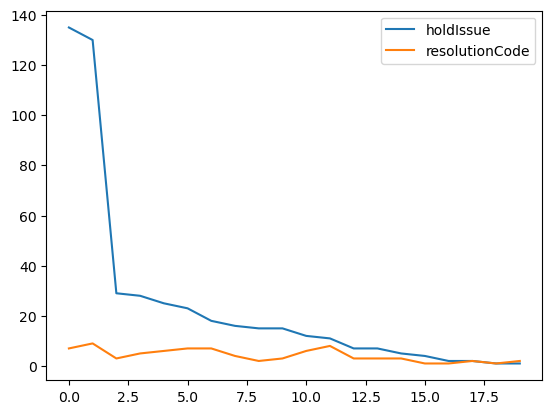

In [405]:
distinct_data.plot()

In [406]:
import seaborn as sns

<AxesSubplot:xlabel='holdIssue', ylabel='holdCode'>

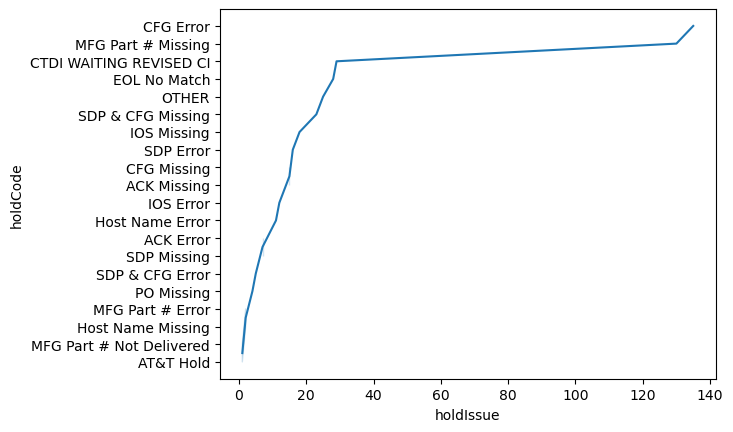

In [407]:
sns.lineplot(x='holdIssue', y='holdCode',data=distinct_data)

In [408]:
final_df2=final_df.reset_index (drop=True)

In [409]:
final_df2["holdCode_holdIssue"]=final_df2["holdCode"]+final_df2["holdIssue"]

In [410]:
final_df2

,holdCode,holdIssue,resolutionCode,holdCode_holdIssue
0,MFG Part # Missing,XDC1001U - QTY.1 NO PART AVAILABLE,MFG PART # PROVIDED,MFG Part # MissingXDC1001U - QTY.1 NO PART AVA...
1,MFG Part # Missing,XDCLHSMD_x000d_\nQTY 1_x000d_\n_x000d_\nPLEASE...,MFG PART # PROVIDED,MFG Part # MissingXDCLHSMD_x000d_\nQTY 1_x000d...
2,MFG Part # Missing,GLC-TE_x000d_\nQTY 1_x000d_\n_x000d_\nPLEASE P...,MFG PART # PROVIDED,MFG Part # MissingGLC-TE_x000d_\nQTY 1_x000d_\...
3,MFG Part # Missing,ISE1079_x000d_\nISE1076_x000d_\nISE1075_x000d_...,MFG PART # PROVIDED,MFG Part # MissingISE1079_x000d_\nISE1076_x000...
4,MFG Part # Missing,ISE1079_x000d_\nISE1076_x000d_\nISE1075_x000d_...,MFG PART # PROVIDED,MFG Part # MissingISE1079_x000d_\nISE1076_x000...
...,...,...,...,...
1686,EOL No Match,SDP MISMATCH WITH ORDER,SDP FILE PROVIDED,EOL No MatchSDP MISMATCH WITH ORDER
1687,EOL No Match,SDP FILE MISMATCH WITH ORDER,SDP FILE PROVIDED,EOL No MatchSDP FILE MISMATCH WITH ORDER
1688,CTDI WAITING REVISED CI,CTDI WAITING FOR REVISED CI,RCD REVISED CI,CTDI WAITING REVISED CICTDI WAITING FOR REVISE...
1689,CFG Error,CFG ERROR,UPDATED CFG FILE,CFG ErrorCFG ERROR


In [411]:
final_df2

,holdCode,holdIssue,resolutionCode,holdCode_holdIssue
0,MFG Part # Missing,XDC1001U - QTY.1 NO PART AVAILABLE,MFG PART # PROVIDED,MFG Part # MissingXDC1001U - QTY.1 NO PART AVA...
1,MFG Part # Missing,XDCLHSMD_x000d_\nQTY 1_x000d_\n_x000d_\nPLEASE...,MFG PART # PROVIDED,MFG Part # MissingXDCLHSMD_x000d_\nQTY 1_x000d...
2,MFG Part # Missing,GLC-TE_x000d_\nQTY 1_x000d_\n_x000d_\nPLEASE P...,MFG PART # PROVIDED,MFG Part # MissingGLC-TE_x000d_\nQTY 1_x000d_\...
3,MFG Part # Missing,ISE1079_x000d_\nISE1076_x000d_\nISE1075_x000d_...,MFG PART # PROVIDED,MFG Part # MissingISE1079_x000d_\nISE1076_x000...
4,MFG Part # Missing,ISE1079_x000d_\nISE1076_x000d_\nISE1075_x000d_...,MFG PART # PROVIDED,MFG Part # MissingISE1079_x000d_\nISE1076_x000...
...,...,...,...,...
1686,EOL No Match,SDP MISMATCH WITH ORDER,SDP FILE PROVIDED,EOL No MatchSDP MISMATCH WITH ORDER
1687,EOL No Match,SDP FILE MISMATCH WITH ORDER,SDP FILE PROVIDED,EOL No MatchSDP FILE MISMATCH WITH ORDER
1688,CTDI WAITING REVISED CI,CTDI WAITING FOR REVISED CI,RCD REVISED CI,CTDI WAITING REVISED CICTDI WAITING FOR REVISE...
1689,CFG Error,CFG ERROR,UPDATED CFG FILE,CFG ErrorCFG ERROR


In [412]:
# Text data clean
final_df2.isnull().sum()

holdCode              0
holdIssue             0
resolutionCode        0
holdCode_holdIssue    0
dtype: int64

In [413]:
final_df2['resolutionCode'].value_counts()

RCD REVISED CI             476
MFG PART # PROVIDED        329
UPDATED CFG FILE           181
OTHER                      162
ACK PROVIDED               132
SDP & CFG FILE PROVIDED    124
CFG FILE PROVIDED           55
UPDATED EOL PROVIDED        41
UPDATED SDP FILE            33
SDP FILE PROVIDED           26
UPDATED SDP&CFG FILE        25
IOS PROVIDED                21
ACK UPDATED                 16
PO PROVIDED                 12
HOST NAME ERROR CLEARED     12
ORDER CANCELLED             11
MORE INFORMATION NEEDED     10
UPDATED IOS                  9
HOST NAME PROVIDED           6
MFG PART #  DELIVERED        5
MFG PRT# UPDATED             4
HOLD IGNORE                  1
Name: resolutionCode, dtype: int64

In [414]:
def cleanText(words):
    words = re.sub("[^a-zA-Z]"," ",words)
    text = words.lower().split()
    return " ".join(text)

final_df2['holdCode_holdIssue'] = final_df2['holdCode_holdIssue'].apply(cleanText)

In [415]:
final_df2['holdCode_holdIssue'].unique()

array(['mfg part missingxdc u qty no part available',
       'mfg part missingxdclhsmd x d qty x d x d please provide eta and tracking once available x d project will be placed on hold report under staging hold',
       'mfg part missingglc te x d qty x d x d please provide eta and tracking once available x d project will be placed on hold report under staging hold',
       'mfg part missingise x d ise x d ise x d x d qty each x d x d please provide eta and tracking once available x d project will be placed on hold report under staging hold',
       'mfg part missingex t x d qty x d cbl ex pwr c c x d qty',
       'mfg part missinghardware replacement x d x d please provide eta and tracking once available x d project will be placed on hold report under staging hold',
       'mfg part missingc x stack x d qty x d please provide eta and tracking once available x d project will be placed on hold report under staging hold',
       'mfg part missingxdcs mc x d please provide eta and trackin

In [416]:
final_df2['holdCode_holdIssue'].head(20)

0           mfg part missingxdc u qty no part available
1     mfg part missingxdclhsmd x d qty x d x d pleas...
2     mfg part missingglc te x d qty x d x d please ...
3     mfg part missingise x d ise x d ise x d x d qt...
4     mfg part missingise x d ise x d ise x d x d qt...
5     mfg part missingise x d ise x d ise x d x d qt...
6     mfg part missingex t x d qty x d cbl ex pwr c ...
7     mfg part missingex t x d qty x d cbl ex pwr c ...
8     mfg part missinghardware replacement x d x d p...
9     mfg part missingc x stack x d qty x d please p...
10    mfg part missingxdcs mc x d please provide eta...
11    mfg part missingxdcs mc x d qty x d x d please...
12    mfg part missingxdcs mc x d qty x d x d please...
13    mfg part missingxdcs mc x d qty x d x d please...
14    mfg part missingxdcs mc qty please provide eta...
15    ack missing ack request x d x d glc te x d x d...
16    po missingsfp g sr qty one each order x d po s...
17    mfg part missingc l stack kit x d qty x d 

In [417]:
final_df2['holdCode_holdIssue'].unique()

array(['mfg part missingxdc u qty no part available',
       'mfg part missingxdclhsmd x d qty x d x d please provide eta and tracking once available x d project will be placed on hold report under staging hold',
       'mfg part missingglc te x d qty x d x d please provide eta and tracking once available x d project will be placed on hold report under staging hold',
       'mfg part missingise x d ise x d ise x d x d qty each x d x d please provide eta and tracking once available x d project will be placed on hold report under staging hold',
       'mfg part missingex t x d qty x d cbl ex pwr c c x d qty',
       'mfg part missinghardware replacement x d x d please provide eta and tracking once available x d project will be placed on hold report under staging hold',
       'mfg part missingc x stack x d qty x d please provide eta and tracking once available x d project will be placed on hold report under staging hold',
       'mfg part missingxdcs mc x d please provide eta and trackin

In [418]:
!pip install nltk
import nltk

In [419]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [420]:
# import nltk
# nltk.download('stopwords')

In [421]:
#stop = set(stopwords.words('english'))
stop = stopwords.words('english')
lem = WordNetLemmatizer()


def remove_stopwords(text):
    """The function to removing stopwords"""
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(text)

def word_lem(text):
    """The function to apply lemmatizing"""
    lem_text = [lem.lemmatize(word) for word in text.split()]
    return " ".join(lem_text)

In [422]:
final_df2['holdCode_holdIssue'] = final_df2['holdCode_holdIssue'].apply(remove_stopwords)
final_df2['holdCode_holdIssue'] = final_df2['holdCode_holdIssue'].apply(word_lem)

In [112]:
#New ANN
# Importing libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Dense, Dropout, Flatten
from sklearn.model_selection import train_test_split


# Preprocessing the data
tokenizer = Tokenizer(num_words=50000)
tokenizer.fit_on_texts(final_df2['holdCode_holdIssue'])
X = tokenizer.texts_to_sequences(final_df2['holdCode_holdIssue'])
X = pad_sequences(X, maxlen=500)
y = pd.get_dummies(final_df2['resolutionCode']).values

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Defining the model architecture
model = Sequential()
model.add(Embedding(input_dim=50000, output_dim=128, input_length=500))
model.add(Flatten())
#model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.05))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))

# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=10, batch_size=8, validation_data=(X_test, y_test), validation_split=0.05)

# Evaluating the model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))


Epoch 1/10
159/159 [==============================] - 21s 127ms/step - loss: 2.0142 - accuracy: 0.4353 - val_loss: 1.2205 - val_accuracy: 0.6407
Epoch 2/10
159/159 [==============================] - 20s 123ms/step - loss: 0.9877 - accuracy: 0.7350 - val_loss: 0.8934 - val_accuracy: 0.6998
Epoch 3/10
159/159 [==============================] - 19s 122ms/step - loss: 0.7107 - accuracy: 0.8028 - val_loss: 0.7497 - val_accuracy: 0.7991
Epoch 4/10
159/159 [==============================] - 20s 123ms/step - loss: 0.5502 - accuracy: 0.8478 - val_loss: 0.7069 - val_accuracy: 0.8251
Epoch 5/10
159/159 [==============================] - 20s 123ms/step - loss: 0.4547 - accuracy: 0.8667 - val_loss: 0.6518 - val_accuracy: 0.8392
Epoch 6/10
159/159 [==============================] - 20s 123ms/step - loss: 0.3994 - accuracy: 0.8880 - val_loss: 0.6106 - val_accuracy: 0.8534
Epoch 7/10
159/159 [==============================] - 20s 123ms/step - loss: 0.3459 - accuracy: 0.9062 - val_loss: 0.6115 - val_ac

In [311]:
y.shape

(1691, 22)

In [347]:
X

array([[  0,   0,   0, ...,  13,  15,  27],
       [  0,   0,   0, ...,  39,  25,  18],
       [  0,   0,   0, ...,  39,  25,  18],
       ...,
       [  0,   0,   0, ...,   5,   3,  10],
       [  0,   0,   0, ...,   2,  94,  32],
       [  0,   0,   0, ...,  77,  98, 170]])

In [348]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [331]:
#LSTM:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
#from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100

# Load and preprocess data
#texts = ['some text data', 'more text data', ...]
#labels = np.array([0, 1, 2, ...]) # Multiclass labels
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(final_df2['holdCode_holdIssue'])
sequences = tokenizer.texts_to_sequences(final_df2['holdCode_holdIssue'])
word_index = tokenizer.word_index
data = pad_sequences(sequences, maxlen=100)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

# Define model architecture
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=data.shape[1]))
model.add(tf.keras.layers.SpatialDropout1D(0.25))
model.add(LSTM(100, dropout=0.25, recurrent_dropout=0.25))
model.add(Dense(22, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
batch_size = 8
model.summary()


Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_33 (Embedding)    (None, 100, 100)          5000000   
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 100, 100)         0         
 lDropout1D)                                                     
                                                                 
 lstm_15 (LSTM)              (None, 100)               80400     
                                                                 
 dense_71 (Dense)            (None, 22)                2222      
                                                                 
Total params: 5,082,622
Trainable params: 5,082,622
Non-trainable params: 0
_________________________________________________________________


In [333]:

    
# Train model
model.fit(X_train, y_train, epochs=15, batch_size=8, validation_data=(X_test, y_test))

# Evaluate model
#test_loss, test_acc = model.evaluate(X_test, y_test)
#print('Test accuracy:', test_acc)

Epoch 1/15
169/169 [==============================] - 46s 274ms/step - loss: 0.2657 - accuracy: 0.9201 - val_loss: 0.6182 - val_accuracy: 0.8112
Epoch 2/15
169/169 [==============================] - 47s 276ms/step - loss: 0.2436 - accuracy: 0.9283 - val_loss: 0.6405 - val_accuracy: 0.8319
Epoch 3/15
169/169 [==============================] - 46s 273ms/step - loss: 0.2436 - accuracy: 0.9223 - val_loss: 0.6373 - val_accuracy: 0.8230
Epoch 4/15
169/169 [==============================] - 43s 257ms/step - loss: 0.2422 - accuracy: 0.9246 - val_loss: 0.5968 - val_accuracy: 0.8201
Epoch 5/15
169/169 [==============================] - 42s 249ms/step - loss: 0.2366 - accuracy: 0.9209 - val_loss: 0.6440 - val_accuracy: 0.8260
Epoch 6/15
169/169 [==============================] - 44s 260ms/step - loss: 0.2179 - accuracy: 0.9260 - val_loss: 0.6447 - val_accuracy: 0.8230
Epoch 7/15
169/169 [==============================] - 45s 269ms/step - loss: 0.2029 - accuracy: 0.9312 - val_loss: 0.6367 - val_ac

In [132]:
y.shape[1]

22

In [353]:
#Stacking
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(final_df2['holdCode_holdIssue'], final_df2['resolutionCode'], test_size=0.25, random_state=42)

# create a TfidfVectorizer to extract features from text data
tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1, 4))

# extract features from the training and testing sets
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# train a random forest classifier on the training set
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train_tfidf, y_train)
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
lr=LogisticRegression()
lr.fit(X_train_tfidf, y_train)
dtc=DecisionTreeClassifier()
dtc.fit(X_train_tfidf, y_train)

# train an ANN classifier on the training set
ann = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000)
ann.fit(X_train_tfidf, y_train)

# use the trained classifiers to generate meta-features for the stacking
X_train_meta = np.concatenate([rf.predict_proba(X_train_tfidf),nb.predict_proba(X_train_tfidf),lr.predict_proba(X_train_tfidf),dtc.predict_proba(X_train_tfidf), ann.predict_proba(X_train_tfidf)], axis=1)
X_test_meta = np.concatenate([rf.predict_proba(X_test_tfidf),nb.predict_proba(X_test_tfidf),lr.predict_proba(X_test_tfidf),dtc.predict_proba(X_test_tfidf), ann.predict_proba(X_test_tfidf)], axis=1)

# train a logistic regression classifier on the meta-features
ann1 = MLPClassifier(hidden_layer_sizes=(30,), max_iter=250)
ann1.fit(X_train_meta, y_train)

# evaluate the stacked model on the testing set
y_pred = ann1.predict(X_test_meta)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8392434988179669


C:\Users\PShukla\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


In [592]:
#Recommendation system

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# define the feature and target variables
X = final_df2['holdCode_holdIssue']
y = final_df2['resolutionCode']

# vectorize the text data
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(X)

# train the multiclass classifier
classifier = OneVsRestClassifier(SVC(kernel='linear', probability=True))
classifier.fit(X, y)

# make predictions for new data

new_text = input()
categories=[['mfg part missingxdc u qty part available',
       'mfg part missingxdclhsmd x qty x x please provide eta tracking available x project placed hold report staging hold',
       'mfg part missingglc te x qty x x please provide eta tracking available x project placed hold report staging hold',
       'mfg part missingise x ise x ise x x qty x x please provide eta tracking available x project placed hold report staging hold',
       'mfg part missingex x qty x cbl ex pwr c c x qty',
       'mfg part missinghardware replacement x x please provide eta tracking available x project placed hold report staging hold',
       'mfg part missingc x stack x qty x please provide eta tracking available x project placed hold report staging hold',
       'mfg part missingxdcs mc x please provide eta tracking available x project placed hold report staging hold',
       'mfg part missingxdcs mc x qty x x please provide eta tracking available x project placed hold report staging hold',
       'mfg part missingxdcs mc qty please provide eta tracking available project placed hold report staging hold',
       'ack missing ack request x x glc te x x asset tag x n acw x x asset tag x n acw je x x asset tag x n avc v x x asset tag x n acw x x asset tag x n acw x x asset tag x n acw gp',
       'po missingsfp g sr qty one order x po needed x x x please provide eta tracking available x project placed hold report staging hold',
       'mfg part missingc l stack kit x qty x x please provide eta tracking available x project placed hold report staging hold',
       'mfg part missingws c cx pd qty',
       'mfg part missingglc lh smd x qty x xdcs mc x qty x please provide eta tracking available',
       'mfg part missingorder picked x staging tech reported item missing x x pool gps ibm inter x part needed x cab c cbn x pwr c wac p x x please provide eta tracking available x project placed hold report staging hold',
       'mfg part missinggps ibm inter ibm iga blue sky x part number needed pwr c wac p x qty',
       'po missingpo number provided gps pick po order x x please provide po number available x x project placed hold report staging hold',
       'mfg part missingxdcs aa x qty x x please provide eta tracking available x project placed hold report staging hold',
       'mfg part missinggps nfod citizen bank national association g sys qty please provide eta tracking available project placed hold report staging hold thank',
       'mfg part missingpart stock ac rm qty',
       'mfg part missingnfx att qty please provide eta tracking available project placed hold report staging hold',
       'mfg part missingpart stock ac rm',
       'mfg part missing gps odsmla dhl information service america inc x xdcs pe x qty x xdcs pe x qty x please provide eta tracking available x project placed hold report staging hold',
       'mfg part missingg reuse u omnicom group inc ex um x sfp qty please provide eta tracking available',
       'mfg part missingc nm x x qty x x please provide eta tracking available x project placed hold report staging hold',
       'mfg part missing gps odsmlan dhl information service america inc sfp g aoc qty please provide eta tracking available project placed hold report staging hold',
       'mfg part missingorder picked x staging tech reported secondary power supply missing x x pwr c wac p x qty x x please provide eta tracking available x project placed hold report staging hold',
       'mfg part missing gps odsmrs williamson county school district x c x qty x gps sx mmd x qty',
       'mfg part missingc nm x qty please provide eta tracking available project placed hold report staging hold',
       'mfg part missing gps sssmlan state california calnet x x w c x p l x qty x x please provide eta tracking available x project placed hold report staging hold',
       'mfg part missingsm x e qty needed',
       'mfg part missingxfp glr sr l x qty x x spa x ge l v x qty x x please provide eta tracking available x project placed hold report staging hold',
       'mfg part missingspa x ge l v x qty x xfp glr sr l x qty x please provide eta tracking available x project placed hold report staging hold',
       'po missingc uxm qty unit available po alternative po needed c nm x pwr c wac p pwr c wac p cab spwr cm stack cm qty cab ta na qty po number missing',
       'mfg part missing qty x ise qty x ise qty x spa x ge l v qty x xdcs ae qty x x x x please provide eta tracking available x project placed hold report staging hold',
       'mfg part missingnim fxs qty please provide eta tracking available project placed hold report staging hold',
       'mfg part missingpart available asb rm ous',
       'mfg part missingpart available ise',
       'ack missing p ack update request',
       'mfg part missingusr c x qty need new box x x please provide eta tracking available x project placed hold report staging hold',
       'mfg part missingglc te x fl perf k x xdcs mc x part missing',
       'mfg part missinglpp mismtce r acc camp investment g p x x ftlf p bnl kg x qty x x please provide eta tracking available x project placed hold report staging hold',
       'mfg part missingxdcs aa lpp mismtce r',
       'mfg part missingnim mft e qty please provide eta tracking available project placed hold report staging hold',
       'mfg part missinggps odsmlan dhl information service america inc stack cm qty xdcs ad qty please provide eta tracking available project placed hold report staging hold',
       'mfg part missinggps gov ao irs bkt qty fg e usg qty kit cbl tel spt qty sm x e p qty pcm qty please provide eta tracking available project placed hold report staging hold thank',
       'host name errorhostname mismatch cfg sdp file',
       'eol matchthe following issue found staging sdp feed missing air ap rail r',
       'cfg errorneed static ip information',
       'cfg errorstatic ip information error',
       'cfg errorrouter conf net host network configuration file host command replaced command copy url system running config address name remote host source filename router confg work ip cfg configure using tftp work ip cfg confirm loading work ip cfg via gigabitethernet ok byte boot system flash bootflash isr universalk spa bin invalid input detected marker ip tftp source gigabitethernet invalid input detected marker',
       'cfg errorwrong config file x order xdc u router',
       'sdp errorsdp file missing hostname',
       'ctdi waiting revised ciwaiting revised ci',
       'cfg errorcard type x x invalid input detected marker x x network clock input source controller x x invalid input detected marker x x isdn switch type primary ni x x invalid input detected marker x warning codec built vad cannot disabled x codec negotiated vad configuration disregarded x x controller x x invalid input detected marker x x clock source line x x invalid input detected marker x x framing esf x x invalid input detected marker x x linecode b z x x invalid input detected marker x x pri group timeslots x x invalid input detected marker x x shutdown x x invalid input detected marker',
       'sdp errorsdp order number mismatch',
       'sdp cfg missingctdi cfg file x ctdi sdp file',
       'cfg error config take effect next reboot boot system flash bootflash isr universalk spa bin invalid input detected marker clock source line warning codec built vad cannot disabled codec negotiated vad configuration disregarded gigabitethernet changing medium rj protocol mode ipv invalid input detected marker retry invite invalid input detected marker',
       'cfg errorprotocol mode ipv invalid input detected marker retry invite invalid input detected marker',
       'cfg errorrouter conf net x host network configuration file host x command replaced command x copy url system running config x address name remote host x source filename router confg work avts txt x configure using tftp work avts txt confirm x loading work avts txt via gigabitethernet x x ok byte x x warning command added configuration using type password h x owever type password soon deprecated migrate supported passwor x type x ip domain name pki att com x x invalid input detected marker',
       'sdp cfg missingwe sdp cfg order',
       'cfg errorplease provide license file ex c p installed unit currently order',
       'cfg erroredit class service forwarding class queue x queue co loss x syntax error x load complete error',
       'cfg errorquote request sent supplier keep posted',
       'cfg errorthe following cfgs following command failing every xdcs mc order ip tftp source interface loopback',
       'cfg errorerror unexpected content oamctl x error cannot verify package db oam tgz x verified o boot juno signed packageproductionecp method ecdsa x sha x error unexpected content juno boot tar x error cannot verify package db o boot juno tgz x verified o crypto signed packageproductionecp method ecdsa sha x error unexpected boot loader conf x error cannot verify package db o crypto tgz x verified o kernel prd signed packageproductionecp method ecdsa sh x x error unexpected boot content izo x error cannot verify package db o kernel prd tgz x verified o libs signed packageproductionecp method ecdsa sha x error unexpected content content izo x error cannot verify package db o libs tgz x verified o runtime signed packageproductionecp method ecdsa sha x x error unexpected content content izo x error cannot verify package db o runtime tgz x verified o zoneinfo signed packageproductionecp method ecdsa sha x x error unexpected content content izo x error cannot verify package db o zoneinfo tgz',
       'cfg errorinterface gigabitethernet x x invalid input detected marker x x load interval x x invalid input detected marker x x interface gigabitethernet x x invalid input detected marker x x service policy output mn shape x x invalid input detected marker',
       'cfg errorunit hw license installed plese send ex c p file installed',
       'cfg errorplease provide license file installed unit hw',
       'cfg missingno cfg file gps',
       'cfg errorswitch conf net x host network configuration file host x command replaced command x copy url system running config x address name remote host x source filename switch confg work txt x configure using tftp work txt confirm x loading work txt via gigabitethernet x ok byte x email address configured cisco smart license portal used conta x ct email address send sch notification x x x invalid input detected marker x x warning notice x x invalid input detected marker x x system restricted solely authorized user x x invalid input detected marker x x legitimate business purpose actual attempted unauthorized x x invalid input detected marker x x access use modification system strictly prohibited x x invalid input detected marker x x agns unauthorized user subject company disciplinary proceeding x x invalid input detected marker x x criminal civil penalty state federal x x invalid input detected marker x x applicable domestic foreign law use system may x x invalid input detected marker x x monitored recorded administrative security reason anyone x x invalid input detected marker x x accessing system expressly consent monitoring advised x x invalid input detected marker x x monitoring reveals possible evidence criminal activity x x invalid input detected marker x x may provide evidence activity law enforcement x x invalid input detected marker x x official user must comply corporate security x x invalid input detected marker x x instruction regarding protection information asset x x invalid input detected marker x x x x invalid input detected marker x x x x invalid input detected marker x x uskfhasismd lo',
       'mfg part missingpart available qty vc p',
       'cfg erroraug smart lic comm failed communication failure cisco smart license utility cslu unable resolve server hostname domain name x interface loopback vrf kaiser nmi match cfg vrf x ip domain lookup x',
       'io errorsdp missing io filename',
       'eol matchsdp feed mismatch cab ac x x cab ac gps pacc ibm k ibm x cab ac gps pacc ibm k ibm',
       'cfg errorlarge cfg error',
       'cfg errorudld port aggressive x x invalid input detected marker x x auto qos trust x x invalid input detected marker',
       'cfg error x invalid input detected marker x x udld port aggressive x x invalid input detected marker x x auto qos trust x x invalid input detected marker',
       'host name errorsdp missing io version hostname',
       'sdp cfg missingno cfg sdp gps',
       'eol matchsdp pick list mismatch pwr c wac x sdp call x pwr c wac x pick list call x pwr c wac',
       'io missingctdi io specified cfg file c aep universalk spa bin',
       'sdp missingno sdp gps',
       'cfg missingno cfg file gps unit w c cx pc',
       'io errorsdp file missing io version',
       'sdp cfg errorthe new sdp still match cfg file provided x please see attached cfg file sdp',
       'cfg errorline aux x x invalid input detected marker x x session timeout x x invalid input detected marker x x exec timeout x x invalid input detected marker',
       'host name errorsdp missing hostname io filename',
       'sdp cfg missingsdp file missing hostname x sdp file missing io version',
       'cfg errorswitch priority use master chassis backup master cha ssis member respectively x x invalid input detected marker x x install add file flash cat k iosxe spa bin activate commit x x invalid input detected marker x x install remove inactive x x invalid input detected marker',
       'host name errorthe host name sdp doc file plm vua vl host name cfg file plm vua vl',
       'sdp errorwrong sdp file gps x order number mismatch sdp',
       'eol matchsdp mismatch feed packing list',
       'otherplease provide vnf part number detail order',
       'io errorcfg missing io filename',
       'cfg errorgps missing information vnf file',
       'cfg erroraborted vpn interface ge tloc extension interface ge present vpn',
       'cfg errorcfg invalid vedge config entering configuration mode terminal vedge config load merge ftp txt vpn downloading ftp txt via vpn ftp txt home admin tmp znhvdxebdj temp config connecting connected logging anonymous logged syst done pwd done type done cwd needed size txt pasv done retr txt done length k unauthoritative txt k kb mb home admin tmp znhvdxebdj temp config saved syntax error missing value error line system ip',
       'io missingcfg missing io filename',
       'cfg error error seen setting interface gigabitethernet default config x x',
       'cfg errorswitch conf net x host network configuration file host x command replaced command x copy url system running config x address name remote host x source filename switch confg work txt x configure using tftp work txt confirm x loading work txt via gigabitethernet x ok byte x x access vlan exist creating vlan x voice vlan exist creating vlan x access vlan exist creating vlan x access vlan exist creating vlan x auto qos voip trust x x invalid input detected marker',
       'cfg errorsource filename switch confg work txt x configure using tftp work txt confirm x loading work txt via gigabitethernet x ok byte x x ip domain lookup x x invalid input detected marker x x interface vlan set default configuration x aug sys log config change buffer logging level debugging xml disabled filtering disabled size x aug sys log config change monitor logging level informational xml disabled filtering disabled x management interface vrf cannot changed x x error seen setting interface gigabitethernet default config x switchport trunk encapsulation dot q x x invalid input detected marker',
       'cfg errorinterface vlan set default configuration x management interface vrf cannot changed x x error seen setting interface gigabitethernet default config x switchport trunk encapsulation dot q x x invalid input detected marker x bad mask address x gtagdoch glega',
       'cfg error jul sys log config change buffer logging level debugging xml disabled filtering disabled size x interface port channel x x invalid input detected marker x x description u ex sw x x invalid input detected marker x x switchport trunk pruning vlan none x x invalid input detected marker x x switchport mode trunk x x invalid input detected marker x x creating port channel interface port channel',
       'cfg erroruplinks another switch usually first two sw stack x x invalid input detected marker x x skip part uplink module card part inventory usually rd x switch stack x x invalid input detected marker',
       'eol matchsdp order feed call pwr c blank power supply',
       'cfg error insertion failed prefix list entry exists x seq permit matching route delete',
       'cfg errorsource filename router confg work txt x configure using tftp work txt confirm x loading work txt via gigabitethernet x ok byte x x gigabitethernet changing medium rj x warning address within subnet interface x ip prefix list dmvpn permit vlan x x invalid input detected marker',
       'cfg error hostname gtadcssshermacga legal lat node name using cisco cb config take effect next reboot x x interface gigabitethernet x x invalid input detected marker x x description unused interface x x invalid input detected marker x x shutdown x x invalid input detected marker',
       'cfg errorwrong license attached x serial number order shw however license provided hw serial number hw',
       'cfg errorunit hw ex efl license installed',
       'io errorkindly load io image file c l universalk wlc cscwb spa smu bin following server x x ftp ctdi com singapore x user attxfer x pas bebdanwi',
       'cfg errorplease informed order hold due confirmation require staging configuration file x config file specified add command startup running configuration kindly review attached capture file advice good ship',
       'otherdoes order need staged stack single unit',
       'mfg part missingpart available',
       'cfg errorrouter conf net host network configuration file host command replaced command copy url system running config address name remote host source filename router confg work cfg configure using tftp work cfg confirm loading work cfg via gigabitethernet ok byte boot system flash bootflash isr universalk spa bin invalid input detected marker',
       'sdp cfg missingplease send cfg sdp order',
       'cfg missingcfg missing line console login prompt',
       'cfg errorcol pf gz admin kyn config ssh int blu prod x x error invalid input detected marker x col pf gz admin kyn config ssh int blu prod x x error invalid input detected marker x col pf gz admin kyn config ssh int blu prod x x error invalid input detected marker x col pf gz admin kyn config ssh int blu prod x x error invalid input detected marker x col pf gz admin kyn config ssh int blu prod x x error invalid input detected marker x col pf gz admin kyn config ssh int blu prod x x error invalid input detected marker x col pf gz admin kyn config ssh int blu prod x x error invalid input detected marker x col pf gz admin kyn config ssh int blu prod x x error invalid input detected marker',
       'cfg errorthe kept banner fine staging config sure coming',
       'cfg errorios ver mismatch cfg sdp file',
       'io missingctdi io specified cfg file cat k iosxe spa bin please upload io ftp ctdi com',
       'eol matchsdp mismatch order x sdp asking nxk acc kit ru order asking nxk acc kit ru',
       'cfg errorswitch conf net x host network configuration file host x command replaced command x copy url system running config x address name remote host x source filename switch confg work txt x configure using tftp work txt confirm x loading work txt via gigabitethernet x ok byte x x ip domain lookup x x invalid input detected marker x x interface vlan set default configuration x management interface vrf cannot changed',
       'cfg errorcfg error',
       'cfg errorip flow ingres invalid input detected marker duplex auto invalid input detected marker speed auto invalid input detected marker ip flow ingres invalid input detected marker ip flow ingres invalid input detected marker ip flow ingres invalid input detected marker ip flow ingres invalid input detected marker ip flow ingres invalid input detected marker ip flow ingres invalid input detected marker ip flow ingres invalid input detected marker ip flow ingres invalid input detected marker ip flow ingres invalid input detected marker ip flow ingres invalid input detected marker ip accounting output packet invalid input detected marker ip flow ingres invalid input detected marker',
       'cfg errorinterface gigabitethernet x x invalid input detected marker x x description unused interface x x invalid input detected marker x x shutdown x x invalid input detected marker x x ip flow capture ttl x x invalid input detected marker x x ip flow cache timeout active x x invalid input detected marker x x output feature x x invalid input detected marker x x interface gigabitethernet x x invalid input detected marker x x ip access group dmz x x invalid input detected marker',
       'cfg errorcfg file error',
       'cfg error config take effect next reboot interface gigabitethernet invalid input detected marker description unused interface invalid input detected marker shutdown invalid input detected marker ip flow capture ttl invalid input detected marker ip flow cache timeout active invalid input detected marker output feature invalid input detected marker shut invalid input detected marker bandwidth ip address invalid input detected marker invalid input detected marker tunnel protection ipsec profile dp dlaw offnet shared invalid input detected marker',
       'cfg errorrouter conf net x host network configuration file host x command replaced command x copy url system running config x address name remote host x source filename router confg work cfg x configure using tftp work cfg confirm x loading work cfg via gigabitethernet x ok byte x x hostname gtadfcsbroalumga legal lat node name using cisco ce config take effect next reboot x x interface gigabitethernet x x invalid input detected marker x x description unused interface x x invalid input detected marker x x shutdown x x invalid input detected marker x x ip flow monitor export netprofiler input x x invalid input detected marker x x ip flow monitor export netprofiler output x x invalid input detected marker x x ip flow capture ttl x x invalid input detected marker x x ip flow cache timeout active x x invalid input detected marker x x output feature x x invalid input detected marker x matching route delete',
       'cfg errorsource filename router confg work txt x configure using tftp work txt confirm x loading work txt via gigabitethernet x ok byte x x speed x x invalid input detected marker x x router bgp bgp asn x x invalid input detected marker x x neighbor soft reconfiguration inbound x x invalid input detected marker x x neighbor send community x x invalid input detected marker x x neighbor route map avpn x x invalid input detected marker x x neighbor route map avpn',
       'cfg errorip flow ingres invalid input detected marker ip flow ingres invalid input detected marker ip flow ingres',
       'io missingctdi io specified cfg file isr universalk spa bin',
       'sdp cfg missingctdi cfg file ctdi sdp file',
       'io missingkindly load io image file jinstall ex r signed tgz following server',
       'eol matcheol order feed mismatch',
       'eol matchsdp feed mismatch pwr c wacac p',
       'host name errorthis order provides following error host name mismatch host name sdp doc file mpg vua p ra host name cfg file mpg vua p ra',
       'sdp cfg errorsdp cfg hostname mismatch',
       'cfg errorcfg error byte total byte free router conf net host network configuration file host command replaced command copy url system running config address name remote host source filename router confg work isr backup txt configure using tftp work isr backup txt confi rm loading work isr backup txt via gigabitether net ok byte please write mem reload config take effect next reboot interface gigabitethernet invalid input detected marker description b b interface invalid input detected marker ip address invalid input detected marker medium type rj invalid input detected marker shutdown invalid input detected marker sep utc sys log config change buffer logging level debugg ing xml disabled filtering disabled size inwilacoi r sep utc lineproto updown line protocol interface loopba ck changed state sep utc sys config p configured programmatically proces exec console console sep utc sys config configured tftp work isr backup txt console inwilacoi r',
       'cfg error byte total byte free router conf net host network configuration file host command replaced command copy url system running config address name remote host source filename router confg work isr primary txt configure using tftp work isr primary txt conf irm loading work isr primary txt via gigabitethe rnet ok byte please write mem reload config take effect next reboot gigabitethernet changing medium rj gigabitethernet changing medium rj set community additive invalid input detected marker set community additive invalid input detected marker insatyban r',
       'eol matchplease informed order hold due mismatch sdp picking list nc lpp evpnap isr advanced micro device export sdn bhd hotel equatorial unit j penang ise error nc lpp evpnap isr advanced micro device export sdn bhd hotel equatorial unit j penang ise error',
       'cfg errorplease informed order hold due shortage firmware staging configuration file part asb rma glb sdp doc',
       'sdp missingctdi sdp file', 'cfg errormissing cfg sdp',
       'host name errorsdp cfg hostname mismatch',
       'cfg errorthe following issue found staging loading cfg file following invalid highlighted red displayed source filename router confg work cfg configure using tftp work cfg confirm loading work cfg via gigabitethernet ok byte ip tftp source gigabitethernet invalid input detected marker mistra',
       'cfg errorcfg invalid router conf net host network configuration file host command replaced command copy url system running config address name remote host source filename router confg work txt configure using tftp work txt confirm error opening tftp work txt file directory router router conf net host network configuration file host command replaced command copy url system running config address name remote host source filename router confg work cfg configure using tftp work cfg confirm loading work cfg via gigabitethernet ok byte ip tftp source source interface gigabitethernet invalid input detected marker',
       'cfg errorsource filename router confg work cfg configure using tftp work cfg confirm loading work cfg via gigabitethernet ok byte ip tftp source interface gigabitethernet g invalid input detected marker gigabitethernet changing medium sfp miscre',
       'cfg errorconnection closed dtactech vyatta l grep stage adi load stage sh stage cfg xml dtactech vyatta sudo adi load stage sh stage applying stage config take minute patient xml syntax error line invalid character entity semicolon done run time load adi order script completed dtactech vyatta sudo adi stage status sh gathering staging state white box complete review stage status log file show hw serial number hw model g hw n hw uuid fbbdb e e bf f b show hardware dmi',
       'cfg errorthe following issue found staging cfg invalid router conf net host network configuration file host command replaced command copy url system running config address name remote host source filename router confg work txt configure using tftp work txt confirm error opening tftp work txt file directory router router conf net host network configuration file host command replaced command copy url system running config address name remote host source filename router confg work cfg configure using tftp work cfg confirm loading work cfg via gigabitethernet ok byte ip tftp source interface gigabitethernet invalid input detected marker',
       'cfg errorthe following issue found staging loading cfg file following invalid highlighted red displayed source filename router confg work cfg configure using tftp work cfg confirm loading work cfg via gigabitethernet ok byte ip tftp source interface gigabitethernet invalid input detected marker misbra',
       'ctdi waiting revised ciwaiting ci',
       'mfg part missingno inventory xdcs uf',
       'cfg errorrouter conf net x host network configuration file host x command replaced command x copy url system running config x address name remote host x source filename router confg work cfg x configure using tftp work cfg confirm x loading work cfg via gigabitethernet x ok byte x x ip tftp source interface loopback x x invalid input detected marker',
       'cfg errorip tftp source interface loopback x x invalid input detected marker',
       'cfg errorcfg contains line ip tftp source interface loopback',
       'cfg errorthe following issue found staging loading cfg file following invalid highlighted red displayed router conf net host network configuration file host command replaced command copy url system running config address name remote host source filename router confg work cfg configure using tftp work cfg confirm loading work cfg via gigabitethernet ok byte ip tftp source interface loopback invalid input detected marker',
       'cfg errorafter loading new cfg file router conf net host network configuration file host command replaced command copy url system running config address name remote host source filename router confg work cfg configure using tftp work cfg confirm loading work cfg via gigabitethernet ok byte ip tftp source interface gigabitethernet invalid input detected marker misguy jul sys log config change buffer logging level debugging xml disabled filtering disabled size jul sys config configured http tftp work cfg console jul link updown interface gigabitethernet changed state jul link updown interface gigabitethernet changed state jul lineproto updown line protocol interface gigabitethernet changed state jul link updown interface gigabitethernet changed state jul lineproto updown line protocol interface gigabitethernet changed state misguy misguy',
       'cfg errorip tftp source interface loopback invalid input detected marker',
       'cfg errorip tftp source interface gigabitethernet x x invalid input detected marker',
       'cfg errordtactech vyatta l grep stage x adi load stage sh x stage cfg xml x dtactech vyatta sudo adi load stage sh stage x x applying stage config take minute patient x x configuration path resource group address group ag wan lan address valid x x must one following value x x x x x x x x x h h h h h h h h h h h h h h h h x x value validation failed x x set failed',
       'cfg missingrouter conf net x host network configuration file host x command replaced command x copy url system running config x address name remote host x source filename router confg work cfg x configure using tftp work cfg confirm x loading work cfg via gigabitethernet x ok byte x x ip tftp source interface gigabitethernet x x invalid input detected marker',
       'cfg errorsource filename router confg work cfg x configure using tftp work cfg confirm x loading work cfg via gigabitethernet x ok byte x x ip tftp source interface gigabitethernet x x invalid input detected marker x x gigabitethernet changing medium sfp x gigabitethernet changing medium rj x mi mar',
       'cfg errorip tftp source interface gigabitethernet invalid input detected marker',
       'otherplease hold order reschedule delivery date hold longer possible',
       'cfg errordtactech vyatta l grep stage x adi load stage sh x stage cfg xml x dtactech vyatta sudo adi load stage sh stage x x applying stage config take minute patient x x configuration path resource group address group ag wan lan address valid x x must one following value x x x x x x x x x h h h h h h h h h h h h h h h h x x value validation failed x x set failed x x done run time load adi order script completed x',
       'sdp cfg missingmissing cfg sdp',
       'cfg errorretry invite invalid input detected marker',
       'cfg errorinvalid interface type q',
       'cfg errorcfg error x gigabitethernet changing medium rj x retry invite x x invalid input detected marker',
       'cfg errorgigabitethernet changing medium rj x protocol mode ipv x x invalid input detected marker x x retry invite',
       'cfg errorprotocol mode ipv x x invalid input detected marker x x retry invite x x invalid input detected marker',
       'cfg errorretry invite x x invalid input detected marker',
       'cfg errorboot system flash bootflash isr universalk spa bin x x invalid input detected marker x clock source line x warning codec built vad cannot disabled x codec negotiated vad configuration disregarded x x gigabitethernet changing medium sfp x protocol mode ipv x x invalid input detected marker x x retry invite x x invalid input detected marker',
       'cfg errorconfiguration path interface dataplane dp p address valid x x node requires value x value validation failed x x set failed x x done run time load adi order script completed',
       'cfg missingctdi cfg file x ctdi sdp file',
       'cfg error applying stage config take minute patient invalid asn strconv parseuint parsing invalid syntax done run time load adi order script completed',
       'cfg errorip tftp source interface gigabitethernet',
       'sdp errorip tftp source interface gigabitethernet',
       'cfg error applying stage config take minute patient xml syntax error line expected attribute name element done run time load adi order script completed',
       'cfg errorconfiguration path resource group address group ag wan lan address valid must one following value x x x x x x x x x h h h h h h h h h h h h h h h h x value validation failed set failed',
       'cfg errorrouter conf net x host network configuration file host x command replaced command x copy url system running config x address name remote host x source filename router confg work ip cfg x configure using tftp work ip cfg confirm x loading work ip cfg via gigabitethernet x ok byte x please write mem reload x config take effect next reboot x x ip tftp source interface gigabitethernet x x invalid input detected marker',
       'cfg errorcfg invalid x x router conf net x host network configuration file host x command replaced command x copy url system running config x address name remote host x source filename router confg work ip cfg x configure using tftp work ip cfg confirm x loading work ip cfg via gigabitethernet x ok byte x please write mem reload x config take effect next reboot x x ip tftp source gigabitethernet x x invalid input detected marker',
       'eol matchpick list call router however sdp calling v router',
       'eol matchorder missing spa x ge l v supposed come bundled xdc e',
       'sdp cfg missingctdi cfg file ctdi sdp file ctdi eol file',
       'cfg errorboot system flash bootflash isr universalk spa bin invalid input detected marker clock source line warning codec built vad cannot disabled codec negotiated vad configuration disregarded gigabitethernet changing medium sfp protocol mode ipv invalid input detected marker retry invite invalid input detected marker',
       'host name errorthis order provides following error host name mismatch host name sdp doc file host name cfg file asr x',
       'eol matchthe feed received c l received',
       'eol matchsdp mismatch order', 'sdp errorsdp mismatch order',
       'cfg errorthe command deprecated use mfib command instead arp frame relay invalid input detected marker arp frame relay',
       'mfg part missingstack cm qty please provide eta tracking available project placed hold report staging hold',
       'mfg part missingc p e qty please provide eta tracking available project placed hold report staging hold',
       'eol matchsdp mismatch order packing list',
       'mfg part missingc nm x gps odsmlan qty xdcs af gps odsmlan qty please provide eta tracking available project placed hold report staging hold',
       'io missingplease informed order still hold due shortage io image file sg ctdi server kindly load io image file jinstall ppc r signed tgz following server',
       'io errorios mismatch cfg list io c l universalk wlc spa bin sdp list io c l universalk wlc spa bin',
       'sdp cfg missingsdp cfg file missing',
       'cfg errorinstall add file flash cat k iosxe spa bin activate commit invalid input detected marker',
       'cfg missingctdi cfg file',
       'mfg part missinggps odsmlan georgia technology authority ise qty ise qty ise qty ise qty please provide eta tracking available project placed hold report staging hold',
       'cfg errorhi issue cfg file password start capitol letter enable secret vapidesi username failsafe privilege password vapidesi',
       'mfg part missingc nm g qty please provide eta tracking available project placed hold report staging hold',
       'sdp cfg errorunable download cfg gps',
       'cfg error please write mem reload config take effect next reboot ip tftp source interface gigabitethernet invalid input detected marker',
       'io missingctdi io ver c universalk b spa bin',
       'io errorctdi io ver c universalk b spa bin',
       'cfg errorrouter ok conf net host network configuration file host command replaced command copy url system running config address name remote host source filename router confg work cfg configure using tftp work cfg confirm loading work cfg via gigabitethernet ok byte ip domain lookup invalid input detected marker',
       'sdp cfg missingplease send new cfg sdp',
       'cfg errorboot system flash bootflash isr universalk spa bin invalid input detected marker',
       'mfg part missingasb ex xx ous qty please provide eta tracking available project placed hold report staging hold',
       'mfg part missingpart missing xdcgltee qty',
       'mfg part missingqty usr g pro qty xdcs uf',
       'mfg part missingpart inventory avaliable',
       'sdp order feed mismatch sdp cfg hostname mismatch sdp missing io filename cfg call sm x e installed order call one',
       'otherno order gps',
       'cfg errorcfg file error ip virtual reassembly invalid input detected marker sh run invalid input detected marker',
       'cfg errorinterface gigabitethernet invalid input detected marker interface gigabitethernet invalid input detected marker interface gigabitethernet',
       'sdp cfg missingunable download cfg sdp gps',
       'eol matchcould please advise done sdp calling x c uxm pick list please find attachment',
       'eol matchsdp order feed mismatch c nm x', 'cfg missingno cfg gps',
       'sdp missingsdp missing', 'cfg errorunable open cfg file gps',
       'sdp cfg missingsystem issue engr task triggered camo task supposed completed backend missing doc',
       'sdp cfg missingorder gps please attach sdp cfg',
       'ctdi waiting revised cictdi waiting ci',
       'ctdi waiting revised ciawaiting ci att',
       'otherctdi cfg file ctdi sdp file ctdi eol file',
       'ctdi waiting revised ciwaiting ci approval',
       'cfg error invalid input detected marker config take effect next reboot system reload required templating state change source loopback invalid input detected marker specify remote peer group command first specify remote peer group command first specify remote peer group command first udp jitter source ip num packet interval invalid input detected marker request data size invalid input detected marker tos invalid input detected marker owner vnetdisc jitter ce nap co invalid input detected marker tag att nettn invalid input detected marker threshold invalid input detected marker timeout invalid input detected marker history enhanced interval bucket',
       'sdp cfg missingctdi sdp file ctdi cfg file needed',
       'ctdi waiting revised cictdi awaitingci doc ship',
       'mfg part missingg reuse u mem flsh g qty',
       'cfg error labeled ge invalid input detected marker sfp ethernet port invalid input detected marker labeled sfp invalid input detected marker region u invalid input detected marker',
       'sdp errorsdp missing hostname io filename',
       'sdp cfg missingsdp cfg hostname mismatch',
       'io missingctdi io specified sdp c cx universalk mz e bin',
       'sdp errormismatch packing list sdp sdp call pwc packing list call pwc',
       'eol matchthe order call ex modem without sim card order need sim card',
       'ctdi waiting revised ciawaiting revised ci',
       'cfg errorreso pf cbx kyn config interface ethernet error invalid input detected marker reso pf cbx kyn config description suf pf vpb att man kyndryl side error invalid input detected marker reso pf cbx kyn config nameif int blu prod error invalid input detected marker reso pf cbx kyn config security level error invalid input detected marker reso pf cbx kyn config ip address error invalid input detected marker reso pf cbx kyn config shu error incomplete command reso pf cbx kyn config reso pf cbx kyn config reso pf cbx kyn config route int blu prod error invalid input detected marker reso pf cbx kyn config reso pf cbx kyn config ssh scopy enable reso pf cbx kyn config ssh stricthostkeycheck reso pf cbx kyn config ssh int blu prod error invalid input detected marker reso pf cbx kyn config ssh int blu prod error invalid input detected marker reso pf cbx kyn config ssh int blu prod error invalid input detected marker configuration last modified enable utc wed dec',
       'mfg part missingqty please provide eta tracking available project placed hold report staging hold',
       'host name errorthis order provides following error host name mismatch host name sdp doc file sttnllgmem r new host name cfg file sttnllgmem r',
       'cfg errorsame issue viptela mips tar gz vedge request software install ftp viptela mips tar gz reboot vpn ftp viptela mips tar gz viptela mips tar gz connecting connected logging anonymous logged syst done pwd done type done cwd needed size viptela mips tar gz pasv done retr viptela mips tar gz done length unauthoritative mb mb viptela mips tar gz saved error kernel image found',
       'cfg errorthe following issue found staging source filename router confg work cfg configure using tftp work cfg confirm loading work cfg via gigabitethernet ok byte please write mem reload config take effect next reboot ip tftp source interface gigabitethernet invalid input detected marker gigabitethernet changing medium sfp gigabitethernet changing medium rj misarm',
       'ctdi waiting revised cictdi waiting revise ci',
       'ctdi waiting revised cictdi waiting revised ci',
       'mfg part missinggps gov co u gov dept health human ntwx glc sx mmd qty sfp g lr qty sfp g sr qty gps gov ao u gov dept health human ntwx order calling sfp g er unit reserved po sfp g er amended asset key updated part nbr asset tag serial nbr sfp g er inl sm please provide eta tracking available project placed hold report staging hold inventory available',
       'cfg errorgigabitethernet invalid input detected marker gigabitethernet invalid input detected marker duplex auto invalid input detected marker speed auto invalid input detected marker gigabitethernet invalid input detected marker duplex auto invalid input detected marker speed auto invalid input detected marker neighbor e f fa update source serial invalid input detected marker',
       'cfg error kb home admin tmp johd dd va temp config saved vedge config commit aborted vpn interface ge name invalid interface ge specified vedge config vedge config end uncommitted change found commit yes cancel vedge',
       'sdp errorsdp file missing hostname sdp file missing io version sdp diagram slot use install nim e',
       'cfg error hostname gtadcaxcentatlga legal lat node name using cisco dc e config take effect next reboot destination invalid input detected marker',
       'eol matchctdi call asb rm ous modem however pick list call asb rm ous',
       'eol matchsdp call x c l p g pick list feed call x c l p g part',
       'cfg errorip cef invalid input detected marker',
       'sdp errorsdp missing io filename sdp cfg hostname mismatch',
       'cfg missingunable open cfg file gps',
       'host name missingsdp missing hostname',
       'mfg part missingstack cm qty sfp g lr qty',
       'mfg part missingusr g pro qty please provide eta tracking available project placed hold report staging hold',
       'cfg errorboot system flash bootflash isr universalk spa bin invalid input detected marker clock source line clock source line warning codec built vad cannot disabled codec negotiated vad configuration disregarded find controller controller invalid input detected marker clock source line primary invalid input detected marker framing esf invalid input detected marker linecode b z invalid input detected marker pri group timeslots invalid input detected marker shutdown invalid input detected marker',
       'sdp cfg missingplease cfg sdp order',
       'mfg part missingxdc p qty ea xdu z qty ea please provide eta tracking available project placed hold report staging hold',
       'mfg part missingcab stk e qty please provide eta tracking available project placed hold report staging hold',
       'mfg part missingupon research order everything except usr pro g reuse u one order could updated installed status please advise proceed',
       'mfg part missingxdcs ab qty please provide eta tracking available project placed hold report staging hold',
       'io missingctdi image specified cfg file viptela mips tar gz',
       'mfg part missingglc te qty please provide eta tracking available project placed hold report staging hold',
       'mfg part missingex ous qty please provide eta tracking available project placed hold report staging hold',
       'mfg part missingxdcs uf', 'eol matchsdp packing list mismatch',
       'cfg errorcfg error ip flow monitor glsflowmonitor input invalid input detected marker ip flow monitor glsflowmonitor output invalid input detected marker ip virtual reassembly invalid input detected marker sh run invalid input detected marker please use snmp server file transfer access group acl protocol tftp ftp sftp rcp scp snmp server enable trap mpls rfc ldp invalid input detected marker snmp server enable trap mpls fast reroute protected invalid input detected marker snmp server enable trap sonet invalid input detected marker snmp server enable trap dlsw invalid input detected marker cannot find community w rldclass',
       'eol matchsdp order feed mismatch',
       'eol matchthe following issue found staging sdp pick list mismatch sim',
       'host name errorthe host name sdp doc file plm vua vl host name cfg file bol vpr hv kyn',
       'cfg errorstatic ip error',
       'mfg part missingpart missing qty xdcs mc',
       'sdp cfg missingno cfg sdp file', 'mfg part missingparts missing',
       'mfg part missingasb rm ous',
       'mfg part missingpart missing po pool',
       'mfg part missingg reuse u sa rw qty gps sssmrs iec na qty rm qty wc ec qty please provide eta tracking available project placed hold report staging hold',
       'eol matchpick list sdp mismatch cab ta na sdp call x cab ta na pick list call x cab ta na',
       'mfg part missingex ous qty please provide eta tracking available project placed hold report staging hold thank',
       'mfg part missingno inventory',
       'cfg errorinterface hundredgige invalid input detected marker description connection wan invalid input detected marker negotiation auto invalid input detected marker ip address invalid input detected marker ip access group inb serial invalid input detected marker ip redirects invalid input detected marker ip unreachables invalid input detected marker ip proxy arp invalid input detected marker ip mfib forwarding input invalid input detected marker ip mfib cef input invalid input detected marker ip mfib cef output invalid input detected marker ipv enable invalid input detected marker ipv address c c c invalid input detected marker ipv redirects invalid input detected marker ipv unreachables invalid input detected marker ipv mfib forwarding input invalid input detected marker ipv mfib cef input invalid input detected marker ipv mfib cef output invalid input detected marker ipv traffic filter inb serial v invalid input detected marker cdp enable invalid input detected marker shutdown',
       'holdctdi requested quarantine order notice',
       'ctdi waiting revised cictdi awaiting revised ci',
       'mfg part missingpart missing cab ace',
       'mfg part missingpart missing cab ac c eur gps o kynd eu',
       'io errorios mismatch cfg list io cat k caa universalk spa bin sdp list io cat k caa universalk spa e e bin',
       'io missingctdi image provided cfg file viptela mips tar gz',
       'sdp cfg missingsdp cfg missing',
       'cfg error invalid input detected marker output feature invalid input detected marker ip address secondary ip helper address invalid input detected marker',
       'mfg part missingvr qty u kit qty please provide eta tracking available project placed hold report staging hold',
       'ack errorplease assist asset key following asset part nbr asset tag serial nbr c uxm fjb',
       'cfg errorcfg error configuration path interface switch sw vif address valid must one following value dhcp dhcpv x x x x x h h h h h h h h x value validation failed set failed',
       'cfg errorip flow monitor export netprofiler input invalid input detected marker ip flow monitor export netprofiler output invalid input detected marker ip flow capture ttl invalid input detected marker ip flow cache timeout active invalid input detected marker',
       'mfg part missinggps sssmrs gta dp dalton xdcs uf qty',
       'cfg missingno cfg file gps replacement order rep sdp ask staging txt hostname dhligyraz',
       'mfg part missinggps odsmlan dhl information service america inc glc te qty please provide eta tracking available project placed hold report staging hold',
       'ack errorwrong part', 'mfg part missingpart wrong pool',
       'mfg part missingpart inventory', 'ack missingack avaliable pool',
       'mfg part missingcbl qty cpw qty ise qty ise qty ise qty k cepe mech qty usr c acc qty usr g pro qty vy ucpe img qty xdscv aa qty please provide eta tracking available project placed hold report procurement hold',
       'mfg part missingparts available g m qty ac asyn qty bmchw qty bmcsw qty eps qty eps qty k cpe mech qty',
       'mfg part missing g m qty ac asyn qty bmchw qty bmcsw qty eps qty eps qty k cpe mech qty please provide eta tracking available project placed hold report procurement hold',
       'mfg part missingpart available c nm x',
       'cfg erroraborted interface gigabitethernet ip address value configuring ip routing lan subinterface allowed subinterface already configured part ieee ieee q sl vlan',
       'io missingsdp missing io filename',
       'io missingsdp missing io version',
       'io errorsdp missing io version',
       'ctdi waiting revised cictdi awaiting revised ci doc',
       'ctdi waiting revised cictdi wainting revised ci doc',
       'ctdi waiting revised cictdi waiting revised ci doc',
       'ctdi waiting revised ciawaiting ci revised copy',
       'ctdi waiting revised ciawaiting ci',
       'eol matchplease informed order hold due mismatch sdp picking list may know part number include shipment please check advice',
       'cfg errormedia type sfp invalid input detected marker network e ee invalid input detected marker aggregate address e ee summary invalid input detected marker',
       'sdp errorwrong sdp file gps',
       'cfg errorhold queue invalid input detected marker ip flow cache timeout inactive invalid input detected marker ip flow cache timeout active invalid input detected marker ip flow export source loopback invalid input detected marker ip flow export version origin invalid input detected marker ip flow export destination invalid input detected marker name key sshkey key modulus size bit generating bit rsa key key non exportable ok elapsed time second',
       'sdp missingplease send sdp order',
       'eol matchsdp order feed mismatch order feed sfp g lr sdp',
       'ack missingack missing pool',
       'mfg part missingisr lpp avpn eu cab ethxover qty please provide eta tracking available project placed hold report procurement hold',
       'mfg part missing cable eu gps nfod eu ise qty vc p qty please provide eta tracking available project placed hold report procurement hold',
       'mfg part missingisr manual eu cab eth rj qty cab ethxover qty please provide eta tracking available project placed hold report procurement hold',
       'cfg missingwe missing config file order please sent u soon possible',
       'ctdi waiting revised cictdi ci awaiting revised ci',
       'mfg part missingparts avaliable nfod pool',
       'mfg part missingparts inventory pool',
       'mfg part missingparts inventory',
       'host name errorhostname mismatch cfg sdp file cfg hostname usseggirttx sdp hostname usseggcaxtx',
       'mfg part missingparts mising pool',
       'mfg part missingpart missing pool', 'ack errorack invalid',
       'ack missingack avaliable', 'cfg errorunable download cfg gps',
       'cfg errorbind control source interface loopback invalid input detected marker bind medium source interface loopback ip tftp source interface loopback invalid input detected marker',
       'cfg errorbind control source interface loopback invalid input detected marker bind medium source interface loopback invalid input detected marker warning codec built vad cannot disabled codec negotiated vad configuration disregarded ip tftp source interface loopback invalid input detected marker',
       'ack missingack cab acu missing', 'ack missingack glc te missing',
       'ack missingall ack missing',
       'mfg part missingused device cab eth rj missing',
       'ack missingack part missing', 'ack missingack missing part ise',
       'ack missingack missing',
       'cfg errorwarning vlan name length exceeded recommended length character ip default gateway invalid input detected marker',
       'mfg part missingreplacement device inventory g reuse pool',
       'mfg part missingc axi qty needed move order',
       'sdp cfg errorplease update cfg sdp attach',
       'cfg error txt k kb mb home admin tmp xn w htndd temp config saved vedge config commit quit aborted illegal reference vpn router bgp neighbor address family ipv unicast route policy vedge config',
       'host name errorhostname mismatch cfg sdp file service config service password encryption lldp run hostname gtagvrapiedatlga hostname sdp gtadbhddallemilga new logging buffered debugging logging monitor informational enable secret vapidesi ip routing',
       'ack errorack issue',
       'io errorthe order call router io specified sdp cfg router isr universalk spa bin',
       'mfg part errorthe following order contain wrong power cord inside box order call following cab awg ac ac power cord awg need qty complete order like order already cord',
       'cfg errorip multicast routing distributed invalid input detected marker interface vlan set default configuration management interface vrf cannot changed error seen setting interface gigabitethernet default config warning vlan name length exceeded recommended length character jan sys log config change buffer logging level debugging xml disabled filtering disabled size jan sys log config change monitor logging level informational xml disabled filtering disabled jan sys config p configured programmatically process exec console console jan sys config p configured programmatically process exec console console switchport trunk encapsulation dot q invalid input detected marker creating port channel interface port channel switchport trunk encapsulation dot q invalid input detected marker creating port channel interface port channel switchport trunk encapsulation dot q invalid input detected marker creating port channel interface port channel switchport trunk encapsulation dot q invalid input detected marker creating port channel interface port channel switchport trunk encapsulation dot q invalid input detected marker creating port channel interface port channel switchport trunk encapsulation dot q invalid input detected marker creating port channel interface port channel switchport trunk encapsulation dot q invalid input detected marker creating port channel interface port channel switchport trunk encapsulation dot q invalid input detected marker creating port channel interface port channel switchport trunk encapsulation dot q invalid input detected marker creating port channel interface port channel switchport trunk encapsulation dot q invalid input detected marker creating port channel interface port channel switchport trunk encapsulation dot q invalid input detected marker creating port channel interface port channel switchport trunk encapsulation dot q invalid input detected marker creating port channel interface port channel access vlan exist creating vlan duplex full invalid input detected marker',
       'cfg errorhello appxk activate allowed edit cfg file please adjust cfg file following correction reverse original cfg know appxk activate router license accept end user agreement license boot level appxk also perf license activated also please add following line cfg reboot take effect platform hardware throughput level',
       'otherwaiting manual',
       'cfg missingctdi static ip stage order please review advise',
       'mfg part missingpart missing inventory',
       'ack errorack issue update required',
       'mfg part missingpart inventory avaliable order',
       'io missingsdp missing io version hostname',
       'ctdi waiting revised cictdi awinting revised ci',
       'mfg part missing cab ac c nim blank nim e sisr uk sl app k sl ipb k xdcs aa',
       'mfg part missingpart missing',
       'ctdi waiting revised cictdi waiting vised ci',
       'cfg errorcfg error log packet overrun pc x faa format user logged command username failsafe failsafe secret vapidesi invalid input detected marker',
       'mfg part missingbo inventory ise gps cable eu',
       'mfg part missingack issue',
       'otherwe user pw order look like another device account userid gbadsl changeme password att',
       'otherthe u would configured bridge mode look like order another device info mail please set modem bridge mode uk country',
       'mfg part missingno inventory asset key',
       'mfg part deliveredno inventory',
       'io missingfirmwarefile sdp config missing',
       'otherios cat k caa universalk spa bin missing',
       'otherissues dialin test',
       'otherwe mismatch io use sdp state cat k lite iosxe spa bin config state cat k iosxe spa bin',
       'ctdi waiting revised ciexport',
       'otherproblem staging dna software need staged normal one',
       'cfg missingthe cfg file attached gps sr file naming convention therefore unable figure cfg file use also host name sdp k f wc c kyn would present hostname mismatch cfg sdp please correct file naming cfg file sr adjust host name match sdp vice versa match please attach correct file via reply',
       'po missingqfx afo missing po', 'mfg part missingno invt',
       'cfg missingwe config gps',
       'otherwe problem staging device script work properly',
       'othernot sure stage script waiting trevors instruction',
       'othernew nfx device know stage need wait trevors response',
       'othersecond power supply listed packing list box',
       'mfg part missingno invt pwc',
       'mfg part missingnim mft e gps u common qty ise gps sssmlan qty please provide eta tracking available project placed hold report staging hold',
       'ctdi waiting revised ciwaiting ct', 'ack missingpart missing',
       'mfg part errortest hold report', 'otherios mismatch sdp cfg',
       'mfg part missingno invt pwr c wac p',
       'ctdi waiting revised cithe appropriate io missing',
       'mfg part missingpart missing according olp',
       'mfg part missingmissing part',
       'cfg errorcfg file error invalid input detected marker output feature invalid input detected marker ip prefix list dmvpn permit vlan secondary invalid input detected marker',
       'sdp cfg missinghardware defective sdp file missing',
       'cfg errorcfg file error configuration path resource group address group ag wan lan address x valid must one following value x x x x x x x x x h h h h h h h h h h h h h h h h x value validation failed set failed done run time load adi order script completed',
       'mfg part missingvip sfp ge lx qty please provide eta tracking available project placed hold report staging hold',
       'mfg part missing qty please provide eta tracking available project placed hold report staging hold',
       'cfg errorconfiguration error found red please attached correct cfg file reply source filename switch confg work txtwork txt work txt configure using tftp work txt confirm loading work txt via gigabitethernet ok byte ip domain lookup invalid input detected marker vlan internal allocation policy ascending invalid input detected marker interface gigabitethernet invalid input detected marker description customer lan invalid input detected marker switchport invalid input detected marker bandwidth invalid input detected marker ip address invalid input detected marker ip helper address invalid input detected marker ip helper address invalid input detected marker load interval invalid input detected marker keepalive invalid input detected marker cdp enable invalid input detected marker shut invalid input detected marker',
       'io missingsdp blank eol also missing io filename',
       'otherprocurement hold',
       'otherconfig saved reboot need time take closer look',
       'mfg part missingxdc z qty please provide eta tracking available project placed hold report staging hold',
       'mfg part missingon procurement hold asb rm ous pool lpp misplus',
       'cfg errorcfg error summary address invalid input detected marker redistribute connected metric type subnets invalid input detected marker passive interface default invalid input detected marker passive interface vlan invalid input detected marker network area invalid input detected marker',
       'otherdevice need de staged staged script fails staging',
       'ctdi waiting revised cishipping hold',
       'sdp cfg missingmissing sdp cfg order',
       'cfg errorstaging hold order asa firepower two seems correct hostname warning banner sr sr order missing host name cfg file also missing warning banner cfg file question asdm image also required loaded specified sdp dial test console port test oob access hostname banner password prompted password upon dial line con password applied cfg file',
       'mfg part missingise qty please provide eta tracking available project placed hold report staging hold',
       'othersn mismatch packing list actual device',
       'cfg errorthe following issue found staging unable access vnf tab retrieve vnf information',
       'mfg part missingnim ge cu sfp',
       'mfg part missingerror message ack ist p must r inventory e',
       'cfg missingunable find cfg gps',
       'mfg part missingno inventory part',
       'mfg part missinginvt missing ise',
       'cfg errorcfg error platform hardware throughput crypto invalid input detected marker',
       'ack errorno invt',
       'sdp errorsdp blank eol also missing io filename',
       'mfg part missinginvt missing',
       'ctdi waiting revised ciwaiting revies ci',
       'sdp cfg missingmissing sdp cfg',
       'otherunable download cfg gps sdp missing hostname io filename please review advise',
       'io errorthe following issue found staging unable download cfg gps sdp missing hostname io filename',
       'cfg errorcfg error bandwidth encapsulation dot q invalid input detected marker',
       'sdp cfg missingunable find cfg gps',
       'mfg part missingthis order going procurement hold ise pool g reuse u',
       'sdp errormultiple issue found order sdp missing hostname sdp call isr io order call isr unit',
       'io missingsdp cfg hostname mismatch io server please upload io ftp server',
       'mfg part missingvarious part missing', 'otherpo missing',
       'sdp cfg errormissing cfg sdp', 'sdp errorthe attached sdp eol sr',
       'io missingctdi io c universalk spa bin',
       'sdp errorsdp gps different sr',
       'eol matchsdp file mismatch order',
       'eol matchsdp missing eol sr number']]


new_text_vectorized = tfidf.transform(new_text)
predictions = classifier.predict(new_text_vectorized)

# print the predicted categories
print(predictions) 








['UPDATED EOL PROVIDED']


In [602]:
type(categories)

list

In [604]:
b=tuple(categories)

In [605]:
type(b)

tuple

In [616]:
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
import nltk

# Define the dataset with input strings and corresponding multioutput labels
X = final_df2['holdCode_holdIssue']
y = final_df2['resolutionCode']
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

# Create a custom stop word list that includes common words like "is", "a", "the", etc.
stop_words = ['is', 'a', 'the', 'of', 'and', 'in', 'to']

# Create a CountVectorizer that ignores stop words and only includes terms that appear in at least two documents
vectorizer = CountVectorizer(stop_words=stop_words, min_df=2)

# Create a pipeline that combines the vectorizer and a multiclass classifier
clf = OneVsRestClassifier(SVC(kernel='linear'))
model = Pipeline([('vectorizer', vectorizer), ('clf', clf)])

# Fit the pipeline to the input data and labels
model.fit(X, y)

# Use the pipeline to predict the multioutput labels for a new input string
new_input = input("Enter the valid combination of hold code & hold issue: ")
predicted_labels = model.predict([new_input])
print("Resolution Code",predicted_labels) 

Enter the valid combination of hold code & hold issue: aaaaaddfhhff
Resolution Code ['OTHER']


In [619]:
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
import nltk

# Define the dataset with input strings and corresponding multioutput labels
X = final_df2['holdCode_holdIssue']
y = final_df2['resolutionCode']
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

# Create a custom stop word list that includes common words like "is", "a", "the", etc.
stop_words = ['is', 'a', 'the', 'of', 'and', 'in', 'to']

# Create a CountVectorizer that ignores stop words and only includes terms that appear in at least two documents
vectorizer = CountVectorizer(stop_words=stop_words, min_df=2)

# Create a pipeline that combines the vectorizer and a multiclass classifier
clf = OneVsRestClassifier(SVC(kernel='linear'))
model = Pipeline([('vectorizer', vectorizer), ('clf', clf)])

# Fit the pipeline to the input data and labels
model.fit(X, y)

# Use the pipeline to predict the multioutput labels for a new input string
HoldType = input("Enter hold type: ")
Holdcode = input("Enter Holdcode: ")
HoldIssue = input("Enter Holdissue: ")
Holdcode_Holdissue = HoldType + Holdcode + HoldIssue
Holdcode_Holdissue = [Holdcode_Holdissue]
holdcode=['MFG Part # Missing', 'ACK Missing', 'PO Missing',
       'Host Name Error', 'EOL No Match', 'CFG Error', 'SDP Error',
       'CTDI WAITING REVISED CI', 'SDP & CFG Missing', 'CFG Missing',
       'IOS Error', 'IOS Missing', 'SDP Missing', 'SDP & CFG Error',
       'OTHER', 'Host Name Missing', 'AT&T Hold', 'ACK Error',
       'MFG Part # Error', 'MFG Part # Not Delivered']
if Holdcode in holdcode:

  predicted_labels = model.predict(Holdcode_Holdissue)
  print("Resolution Code",predicted_labels) 
else:
  print("System recieves new Hold Code. Please validate new holdcode:- ", Holdcode)  


Enter hold type: a
Enter Holdcode: b
Enter Holdissue: c
System recieves new Hold Code. Please validate new holdcode:-  b


In [614]:
categories=[['MFG PART # PROVIDED', 'MFG PRT# UPDATED', 'ACK PROVIDED',
       'PO PROVIDED', 'HOLD IGNORE', 'MFG PART #  DELIVERED',
       'HOST NAME ERROR CLEARED', 'UPDATED EOL PROVIDED',
       'CFG FILE PROVIDED', 'UPDATED CFG FILE', 'UPDATED SDP FILE',
       'RCD REVISED CI', 'OTHER', 'SDP & CFG FILE PROVIDED',
       'IOS PROVIDED', 'HOST NAME PROVIDED', 'SDP FILE PROVIDED',
       'UPDATED IOS', 'UPDATED SDP&CFG FILE', 'ORDER CANCELLED',
       'ACK UPDATED', 'MORE INFORMATION NEEDED']]


In [520]:
new_text = ["MFG"]
new_text[0][0]

'M'

In [129]:
#Voting
# Import the necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline


# Create the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('voting', VotingClassifier([
        ('nb', MultinomialNB()),
        ('lr', LogisticRegression()),
        ('svm', LinearSVC()),
        ('rf', RandomForestClassifier())
    ]))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(final_df2['holdCode_holdIssue'], final_df2['resolutionCode'], test_size=0.2, shuffle=True)

# Train the model
pipeline.fit(X_train, y_train)

# Evaluate the model
accuracy = pipeline.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 88.50%


In [142]:
#Voting
# Import the necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Create the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('voting', VotingClassifier([
        ('nb', MultinomialNB()),
        ('lr', LogisticRegression()),
        ('svm', LinearSVC()),
        ('rf', RandomForestClassifier()),
        ('dtc', DecisionTreeClassifier())
    ]))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(final_df2['holdCode_holdIssue'], final_df2['resolutionCode'], test_size=0.2, shuffle=True)

# Train the model
pipeline.fit(X_train, y_train)

# Evaluate the model
accuracy = pipeline.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 89.09%


In [220]:
#Voting
# Import the necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Create the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('voting', VotingClassifier([
        #('nb', MultinomialNB()),
        ('lr', LogisticRegression()),
        ('svm', LinearSVC()),
        ('rf', RandomForestClassifier()),
        ('dtc', DecisionTreeClassifier()),
    ]))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(final_df2['holdCode_holdIssue'], final_df2['resolutionCode'], test_size=0.2, shuffle=True)

# Train the model
pipeline.fit(X_train, y_train)

# Evaluate the model
accuracy = pipeline.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 89.38%


In [238]:
#Voting
# Import the necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Create the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('voting', VotingClassifier([
        #('nb', MultinomialNB()),
        ('lr', LogisticRegression()),
        ('svm', LinearSVC()),
        ('rf', RandomForestClassifier()),
        ('dtc', DecisionTreeClassifier()),
    ]))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(final_df2['holdCode_holdIssue'], final_df2['resolutionCode'], test_size=0.2, shuffle=True)

# Train the model
pipeline.fit(X_train, y_train)

# Evaluate the model
accuracy = pipeline.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 89.68%


In [352]:
#Voting
# Import the necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import ElasticNet
import xgboost
from xgboost import XGBClassifier

# Create the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('voting', VotingClassifier([
        ('nb', MultinomialNB()),
        ('lr', LogisticRegression()),
        ('svm', LinearSVC()),
        ('rf', RandomForestClassifier()),
        ('dtc', DecisionTreeClassifier()),
        ('xgb', XGBClassifier())
        
    ]))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(final_df2['holdCode_holdIssue'], final_df2['resolutionCode'], test_size=0.2, shuffle=True)

# Train the model
pipeline.fit(X_train, y_train)

# Evaluate the model
accuracy = pipeline.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 89.68%


In [370]:
# Classification report (89.68%)make predictions on test set
y_pred = pipeline.predict(X_test)
ytest = np.array(y_test)
print(classification_report(ytest, y_pred))

                         precision    recall  f1-score   support

           ACK PROVIDED       0.96      1.00      0.98        24
            ACK UPDATED       1.00      0.33      0.50         3
      CFG FILE PROVIDED       0.80      0.44      0.57         9
HOST NAME ERROR CLEARED       0.50      0.33      0.40         3
     HOST NAME PROVIDED       0.00      0.00      0.00         1
           IOS PROVIDED       0.67      0.67      0.67         6
    MFG PART # PROVIDED       0.88      0.87      0.88        53
       MFG PRT# UPDATED       0.00      0.00      0.00         2
MORE INFORMATION NEEDED       1.00      1.00      1.00         4
        ORDER CANCELLED       1.00      0.25      0.40         4
                  OTHER       0.81      0.92      0.86        38
            PO PROVIDED       1.00      1.00      1.00         2
         RCD REVISED CI       0.99      1.00      0.99        99
SDP & CFG FILE PROVIDED       0.93      0.96      0.95        27
      SDP FILE PROVIDED 

C:\Users\PShukla\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PShukla\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PShukla\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [428]:
import lightgbm

In [334]:
#Multi ML Models
# import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC


# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(final_df2['holdCode_holdIssue'],final_df2['resolutionCode'], test_size=0.2, random_state=42)

# create a CountVectorizer object and fit it to the training data
vectorizer = CountVectorizer()
vectorizer.fit(X_train)

# transform the training and testing data into feature vectors
X_train_vect = vectorizer.transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# create a list of machine learning models to compare
models = [MultinomialNB(), LogisticRegression(), RandomForestClassifier(), LinearSVC()]

# iterate over the list of models and fit each one to the training data
for model in models:
    model.fit(X_train_vect, y_train)
    
    # make predictions on the testing data and calculate accuracy
    y_pred = model.predict(X_test_vect)
    acc = accuracy_score(y_test, y_pred)
    
    # print the accuracy for each model
    print(f"{type(model).__name__} accuracy: {acc}")

MultinomialNB accuracy: 0.8082595870206489


C:\Users\PShukla\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression accuracy: 0.831858407079646
RandomForestClassifier accuracy: 0.8407079646017699
LinearSVC accuracy: 0.8377581120943953


C:\Users\PShukla\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [425]:
# Load necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(final_df2['holdCode_holdIssue'], final_df2['resolutionCode'], test_size=0.2, shuffle=True)
# Define the pipelines for each model
nb = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())
])

lr = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression())
])

rf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier())
])

# Define the hyperparameters for each model
nb_params = {
    'vect__ngram_range': [(1, 1), (1, 2)],
    'tfidf__use_idf': (True, False),
    'clf__alpha': [1, 0.1, 0.01, 0.001, 0.0001]
}

lr_params = {
    'vect__ngram_range': [(1, 1), (1, 2)],
    'tfidf__use_idf': (True, False),
    'clf__C': [0.1, 1, 10, 100]
}

rf_params = {
    'vect__ngram_range': [(1, 1), (1, 2)],
    'tfidf__use_idf': (True, False),
    'clf__n_estimators': [50, 100, 200],
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5, 10]
}

# Perform grid search to find the best hyperparameters for each model
nb_gs = GridSearchCV(nb, nb_params, cv=5, n_jobs=-1)
lr_gs = GridSearchCV(lr, lr_params, cv=5, n_jobs=-1)
rf_gs = GridSearchCV(rf, rf_params, cv=5, n_jobs=-1)

nb_gs.fit(X_train, y_train)
lr_gs.fit(X_train, y_train)
rf_gs.fit(X_train, y_train)

# Print the best hyperparameters for each model
print("Naive Bayes:", nb_gs.best_params_)
print("Logistic Regression:", lr_gs.best_params_)
print("Random Forest:", rf_gs.best_params_)

# Combine the models using a Voting Classifier with the best hyperparameters
voting_clf = VotingClassifier(estimators=[('nb', nb_gs.best_estimator_), ('lr', lr_gs.best_estimator_), ('rf', rf_gs.best_estimator_)], voting='hard')

# Train the model
voting_clf.fit(X_train, y_train)

# Test the model
y_pred = voting_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test,y_pred))

C:\Users\PShukla\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\PShukla\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\PShukla\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:

Naive Bayes: {'clf__alpha': 0.01, 'tfidf__use_idf': False, 'vect__ngram_range': (1, 2)}
Logistic Regression: {'clf__C': 100, 'tfidf__use_idf': False, 'vect__ngram_range': (1, 2)}
Random Forest: {'clf__max_depth': None, 'clf__min_samples_split': 5, 'clf__n_estimators': 100, 'tfidf__use_idf': False, 'vect__ngram_range': (1, 2)}


C:\Users\PShukla\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8407079646017699


In [133]:
#XGB--
import numpy as np
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score



# Preprocessing the data
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(final_df2['holdCode_holdIssue'])
X = tokenizer.texts_to_sequences(final_df2['holdCode_holdIssue'])
X = pad_sequences(X, maxlen=500)
y = pd.get_dummies(final_df2['resolutionCode']).values

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# define xgboost model
model = xgb.XGBClassifier(max_depth=7, n_estimators=500)

# train the model
model.fit(X_train, y_train)

# make predictions on test set
y_pred = model.predict(X_test)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.85%


C:\Users\PShukla\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\PShukla\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\PShukla\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:

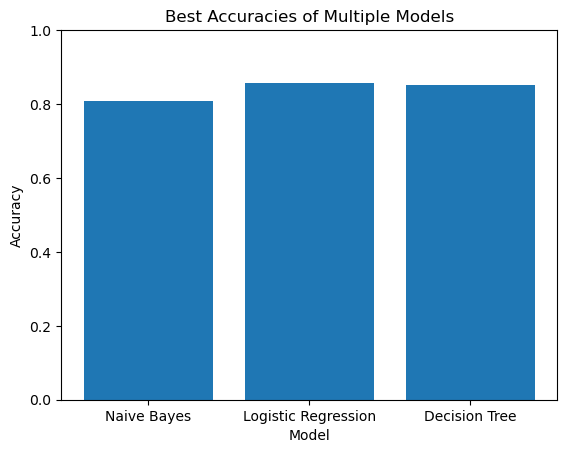

In [53]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(final_df2['holdCode_holdIssue'],final_df2['resolutionCode'], test_size=0.2, random_state=42)

# create a CountVectorizer object and fit it to the training data
vectorizer = CountVectorizer()
vectorizer.fit(X_train)

# transform the training and testing data into feature vectors
X_train_vect = vectorizer.transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Define the classifiers to use
classifiers = [
    ('Naive Bayes', MultinomialNB()),
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier())
]

# Train each classifier using 5-fold cross-validation
results = []
for name, clf in classifiers:
    scores = cross_val_score(clf,X_train_vect, y_train, cv=5)
    accuracy = scores.mean()
    results.append((name, accuracy))

# Plot the results
names, accuracies = zip(*results)
plt.bar(names, accuracies)
plt.title('Best Accuracies of Multiple Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim((0.0, 1.0))
plt.show()

### By Logistic regression

In [142]:
train, test = train_test_split(final_df2, test_size=0.2, random_state=42)

In [143]:
train_tag = train.apply(lambda x: TaggedDocument(words=word_tokenize(x['holdCode_holdIssue']), tags=[x.resolutionCode]), axis=1)

test_tag = test.apply(lambda x: TaggedDocument(words=word_tokenize(x['holdCode_holdIssue']), tags=[x.resolutionCode]), axis=1)

In [144]:
doc_model = Doc2Vec(dm=0, vector_size=100, min_count=2, window=2, sample = 0)
               
doc_model.build_vocab(train_tag)

In [145]:
doc_model.corpus_total_words

16693

In [146]:
%time doc_model.train(train_tag, total_examples=doc_model.corpus_count, epochs=30) 

Wall time: 1.72 s


In [147]:
def vector_for_learning(model, input_docs):
    sents = input_docs
    targets, feature_vectors = zip(*[(doc.tags[0], model.infer_vector(doc.words)) for doc in sents])
    return targets, feature_vectors

In [148]:
y_train, X_train = vector_for_learning(doc_model, train_tag)
y_test, X_test = vector_for_learning(doc_model, test_tag)

In [149]:
log_reg = LogisticRegression(n_jobs=1, C=5)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

C:\Users\PShukla\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [150]:
print('Testing accuracy %s' % accuracy_score(y_pred, y_test))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.8230088495575221
Testing F1 score: 0.807872410004064


In [151]:
ytest = np.array(y_test)
print(classification_report(ytest, y_pred))

                         precision    recall  f1-score   support

           ACK PROVIDED       0.82      0.90      0.86        20
            ACK UPDATED       0.00      0.00      0.00         2
      CFG FILE PROVIDED       0.82      0.50      0.62        18
HOST NAME ERROR CLEARED       0.00      0.00      0.00         0
           IOS PROVIDED       0.57      0.80      0.67         5
    MFG PART # PROVIDED       0.85      0.88      0.87        84
       MFG PRT# UPDATED       0.00      0.00      0.00         2
        ORDER CANCELLED       0.33      0.33      0.33         3
                  OTHER       0.68      0.60      0.64        25
            PO PROVIDED       1.00      1.00      1.00         2
         RCD REVISED CI       1.00      1.00      1.00        89
SDP & CFG FILE PROVIDED       0.78      0.95      0.86        22
      SDP FILE PROVIDED       0.44      0.57      0.50         7
       UPDATED CFG FILE       0.79      0.89      0.84        38
   UPDATED EOL PROVIDED 

C:\Users\PShukla\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PShukla\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PShukla\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PShukla\Anaconda3\lib\site-packages\sklearn\metr

### Linear Support Vector Machine




In [152]:

svm = LinearSVC()
svm.fit(X_train, y_train)

LinearSVC()

In [153]:
preds = svm.predict(X_test)
print('Testing accuracy %s' % accuracy_score(preds, y_test))
print('Testing F1 score: {}'.format(f1_score(y_test, preds, average='weighted')))

Testing accuracy 0.8230088495575221
Testing F1 score: 0.8101504477207345


In [154]:
print(classification_report(ytest, preds))

                         precision    recall  f1-score   support

           ACK PROVIDED       0.86      0.90      0.88        20
            ACK UPDATED       0.00      0.00      0.00         2
      CFG FILE PROVIDED       0.91      0.56      0.69        18
HOST NAME ERROR CLEARED       0.00      0.00      0.00         0
           IOS PROVIDED       0.57      0.80      0.67         5
    MFG PART # PROVIDED       0.86      0.86      0.86        84
       MFG PRT# UPDATED       0.00      0.00      0.00         2
MORE INFORMATION NEEDED       0.00      0.00      0.00         0
        ORDER CANCELLED       0.33      0.33      0.33         3
                  OTHER       0.65      0.60      0.63        25
            PO PROVIDED       1.00      1.00      1.00         2
         RCD REVISED CI       1.00      1.00      1.00        89
SDP & CFG FILE PROVIDED       0.78      0.95      0.86        22
      SDP FILE PROVIDED       0.44      0.57      0.50         7
       UPDATED CFG FILE 

C:\Users\PShukla\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PShukla\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PShukla\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PShukla\Anaconda3\lib\site-packages\sklearn\metr

### 

In [155]:
dm_model = Doc2Vec(dm=1, vector_size=100, min_count=2, window=2, sample = 0, negative=5, alpha=0.025, min_alpha=0.001)
dm_model.build_vocab(train_tag)

In [156]:
dm_model.corpus_total_words

16693

In [157]:
%time dm_model.train(train_tag, total_examples=dm_model.corpus_count, epochs=30) 

Wall time: 2.74 s


In [158]:
y_train_dm, X_train_dm = vector_for_learning(dm_model, train_tag)
y_test_dm, X_test_dm = vector_for_learning(dm_model, test_tag)

In [159]:
log_reg = LogisticRegression(n_jobs=1, C=5)
log_reg.fit(X_train_dm, y_train_dm)
pred = log_reg.predict(X_test_dm)

print('Testing accuracy %s' % accuracy_score(y_test_dm, pred))
print('Testing F1 score: {}'.format(f1_score(y_test_dm, pred, average='weighted')))

Testing accuracy 0.7817109144542773
Testing F1 score: 0.7694193965746118


C:\Users\PShukla\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [160]:
ytest = np.array(y_test_dm)
print(classification_report(ytest, pred))

                         precision    recall  f1-score   support

           ACK PROVIDED       0.75      0.90      0.82        20
            ACK UPDATED       0.00      0.00      0.00         2
      CFG FILE PROVIDED       1.00      0.44      0.62        18
HOST NAME ERROR CLEARED       0.00      0.00      0.00         0
           IOS PROVIDED       0.25      0.20      0.22         5
    MFG PART # PROVIDED       0.78      0.87      0.82        84
       MFG PRT# UPDATED       0.00      0.00      0.00         2
MORE INFORMATION NEEDED       0.00      0.00      0.00         0
        ORDER CANCELLED       0.00      0.00      0.00         3
                  OTHER       0.70      0.56      0.62        25
            PO PROVIDED       0.50      1.00      0.67         2
         RCD REVISED CI       0.98      0.98      0.98        89
SDP & CFG FILE PROVIDED       0.78      0.95      0.86        22
      SDP FILE PROVIDED       0.50      0.57      0.53         7
       UPDATED CFG FILE 

C:\Users\PShukla\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PShukla\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PShukla\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PShukla\Anaconda3\lib\site-packages\sklearn\metr

In [161]:
svm = LinearSVC()
svm.fit(X_train_dm, y_train_dm)
pred_y = svm.predict(X_test_dm)

C:\Users\PShukla\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [162]:
print('Testing accuracy %s' % accuracy_score(pred_y, y_test_dm))
print('Testing F1 score: {}'.format(f1_score(y_test_dm, pred_y, average='weighted')))

Testing accuracy 0.7935103244837758
Testing F1 score: 0.7730509715935479


In [163]:
print(classification_report(ytest, pred_y))

                         precision    recall  f1-score   support

           ACK PROVIDED       0.70      0.95      0.81        20
            ACK UPDATED       0.00      0.00      0.00         2
      CFG FILE PROVIDED       0.80      0.44      0.57        18
           IOS PROVIDED       0.40      0.40      0.40         5
    MFG PART # PROVIDED       0.79      0.86      0.82        84
       MFG PRT# UPDATED       0.00      0.00      0.00         2
MORE INFORMATION NEEDED       0.00      0.00      0.00         0
        ORDER CANCELLED       0.00      0.00      0.00         3
                  OTHER       0.74      0.56      0.64        25
            PO PROVIDED       0.50      1.00      0.67         2
         RCD REVISED CI       0.98      0.98      0.98        89
SDP & CFG FILE PROVIDED       0.68      0.95      0.79        22
      SDP FILE PROVIDED       0.64      1.00      0.78         7
       UPDATED CFG FILE       0.78      0.82      0.79        38
   UPDATED EOL PROVIDED 

C:\Users\PShukla\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PShukla\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PShukla\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PShukla\Anaconda3\lib\site-packages\sklearn\metr

In [184]:
## CATBOOST:-

In [164]:
!pip install catboost

In [165]:
import catboost

In [166]:
from catboost import CatBoostClassifier, Pool
import pandas as pd

#data = pd.DataFrame({'string_column': ['val0', 'val1', 'val2'],
                     #'int_column': [1,2,3],
                     #'float_column': [1.2,2,4.1]})
#print(data)
#print(data.dtypes)




In [167]:
type(X_train)

tuple

In [168]:
X_train

(array([-2.40243629e-01, -3.28711092e-01,  4.98301871e-02,  2.61893421e-01,
         2.36130103e-01,  4.68594618e-02, -2.34203592e-01, -3.74156348e-02,
        -4.15353775e-01, -1.97797026e-02, -1.57615304e-01,  2.06505671e-01,
         5.42954355e-03, -2.29653358e-01,  1.57221537e-02, -8.39019865e-02,
         6.30903319e-02,  9.83671844e-02, -1.82568148e-01,  1.76409647e-01,
        -9.93644968e-02, -1.83878899e-01, -2.16174766e-01, -3.11270152e-04,
        -4.37024236e-02, -3.10004681e-01, -1.79563478e-01, -1.50917262e-01,
        -1.52491614e-01,  3.99006251e-03,  2.10401058e-01,  8.92623737e-02,
        -9.68265310e-02,  1.21966489e-02,  1.45295143e-01,  1.23340450e-02,
        -1.82151660e-01, -3.32454622e-01, -1.80774495e-01, -1.23520292e-01,
        -4.71796431e-02, -4.61608209e-02,  2.13608190e-01, -4.04370651e-02,
         8.93070921e-02,  1.27918899e-01, -3.12834792e-02, -4.51556221e-02,
         5.15952446e-02, -1.49822846e-01,  4.20363098e-02,  1.20027103e-02,
        -9.6

In [169]:
type(y_train)

tuple

In [170]:
import numpy as np
X_train1 = np.array(X_train)
y_train1 = np.array(y_train) 

In [172]:
train_data = Pool(
    X_train1,y_train1
)


In [177]:
model = CatBoostClassifier(
    iterations=100,
    random_seed=42,
    learning_rate=0.1,
    
)
model.fit(X=train_data)

0:	learn: 2.3064412	total: 1.24s	remaining: 2m 2s
1:	learn: 1.9777679	total: 2.26s	remaining: 1m 50s
2:	learn: 1.7571334	total: 3.61s	remaining: 1m 56s
3:	learn: 1.5723806	total: 4.98s	remaining: 1m 59s
4:	learn: 1.4305034	total: 6.18s	remaining: 1m 57s
5:	learn: 1.3163224	total: 7.14s	remaining: 1m 51s
6:	learn: 1.2117494	total: 8.47s	remaining: 1m 52s
7:	learn: 1.1356509	total: 9.79s	remaining: 1m 52s
8:	learn: 1.0673099	total: 11.2s	remaining: 1m 53s
9:	learn: 1.0012706	total: 12.9s	remaining: 1m 56s
10:	learn: 0.9477037	total: 13.5s	remaining: 1m 49s
11:	learn: 0.8979374	total: 15s	remaining: 1m 49s
12:	learn: 0.8578261	total: 16.4s	remaining: 1m 49s
13:	learn: 0.8236919	total: 17.9s	remaining: 1m 50s
14:	learn: 0.7867643	total: 19.1s	remaining: 1m 48s
15:	learn: 0.7531209	total: 21.3s	remaining: 1m 51s
16:	learn: 0.7244784	total: 22.1s	remaining: 1m 48s
17:	learn: 0.6967630	total: 23.4s	remaining: 1m 46s
18:	learn: 0.6706184	total: 24.8s	remaining: 1m 45s
19:	learn: 0.6494389	tota

In [178]:
X_test1 = np.array(X_test)

In [179]:
y_pred = model.predict(X_test1)

In [180]:
print('Testing accuracy %s' % accuracy_score(y_pred, y_test))


Testing accuracy 0.8436578171091446


In [181]:
type(X_train)

tuple

In [182]:
from catboost import CatBoostClassifier, Pool
import pandas as pd

In [183]:
X_train1

array([[-2.40243629e-01, -3.28711092e-01,  4.98301871e-02, ...,
        -1.91268623e-01,  2.93589401e-05,  2.11633630e-02],
       [-2.12971836e-01, -3.74487817e-01, -1.00639075e-01, ...,
        -5.63913994e-02,  1.04004465e-01, -1.17409967e-01],
       [-3.16193700e-01, -4.25386161e-01, -6.37272820e-02, ...,
        -9.93813202e-02, -7.79802576e-02,  6.57070726e-02],
       ...,
       [-2.48236313e-01, -3.18591207e-01, -1.69651493e-01, ...,
        -3.25561799e-02,  1.84455976e-01,  1.09978942e-02],
       [-2.95507759e-01, -4.16835874e-01,  1.25161141e-01, ...,
        -1.51927724e-01,  1.96331099e-01, -7.04844072e-02],
       [-1.43035010e-01, -2.13061407e-01, -4.46568336e-03, ...,
         1.00716995e-02,  8.73342827e-02, -7.73727521e-02]], dtype=float32)

In [184]:
X_train2 = pd.DataFrame(X_train1)
y_train2 = pd.DataFrame(y_train1)

X_test2 = pd.DataFrame(X_test1)
y_test2 = pd.DataFrame(y_test1)

NameError: name 'y_test1' is not defined

In [185]:
X_train2

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.240244,-0.328711,0.049830,0.261893,0.236130,0.046859,-0.234204,-0.037416,-0.415354,-0.019780,...,-0.189972,0.156162,-0.210594,-0.123063,-0.189912,-0.013293,-0.024180,-0.191269,0.000029,0.021163
1,-0.212972,-0.374488,-0.100639,0.282585,0.209836,0.178908,-0.290857,-0.132224,-0.473595,-0.030498,...,-0.286003,0.258275,-0.275995,-0.190637,-0.045638,0.106209,-0.098010,-0.056391,0.104004,-0.117410
2,-0.316194,-0.425386,-0.063727,0.132851,0.004006,0.136746,-0.059741,0.136809,-0.150792,0.027537,...,-0.375322,0.127991,0.089938,0.152541,0.043698,-0.152716,-0.180662,-0.099381,-0.077980,0.065707
3,-0.311346,-0.425514,0.131124,0.168965,0.501493,0.040239,0.202605,-0.186254,-0.198606,0.072465,...,-0.363886,-0.117824,-0.300184,-0.138740,0.130365,0.063633,-0.193691,-0.151058,0.197225,-0.070667
4,-0.302991,-0.436127,0.123681,0.168154,0.532888,0.058666,0.247202,-0.192456,-0.176991,0.073759,...,-0.376788,-0.160518,-0.279016,-0.124696,0.160191,0.058434,-0.199634,-0.157275,0.205112,-0.065292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1347,-0.247796,-0.383846,0.095354,0.132646,0.461919,0.072605,0.201720,-0.199540,-0.176559,0.075793,...,-0.324080,-0.141465,-0.238103,-0.139080,0.160640,0.036778,-0.187362,-0.138398,0.175225,-0.047786
1348,-0.234934,-0.342744,-0.108300,0.123356,0.351283,0.098923,0.194644,-0.240553,-0.112477,0.076060,...,-0.410243,-0.073059,-0.215977,-0.114167,0.239622,0.109084,-0.181239,-0.069642,0.304188,-0.006209
1349,-0.248236,-0.318591,-0.169651,0.241308,0.226951,0.087254,-0.285320,-0.163948,-0.403765,-0.017909,...,-0.316992,0.223447,-0.213456,-0.204912,-0.118720,0.081231,-0.128566,-0.032556,0.184456,0.010998
1350,-0.295508,-0.416836,0.125161,0.178356,0.526053,0.055617,0.217273,-0.194626,-0.198815,0.059025,...,-0.362734,-0.141515,-0.289439,-0.134259,0.135517,0.056578,-0.196523,-0.151928,0.196331,-0.070484


In [186]:
y_test2

NameError: name 'y_test2' is not defined

In [187]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import numpy as np



# Define base models
models = [
    LogisticRegression(),
    SVC(kernel='linear', probability=True),
    #RandomForestClassifier(n_estimators=100, random_state=42)
]

# Define meta model
meta_model = LogisticRegression()

# Define number of folds for cross-validation
n_folds = 2

# Create empty array to store meta-features
X_meta_train = np.zeros((len(X_train1), len(models)))

# Perform cross-validation for base models
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)
for i, model in enumerate(models):
    for train_idx, val_idx in skf.split(X_train1, y_train1):
        model.fit(X_train1[train_idx], y_train1[train_idx])
        y_pred_val = model.predict_proba(X_train1[val_idx])[:, 1]
        X_meta_train[val_idx, i] = y_pred_val

# Fit meta model on meta-features
meta_model.fit(X_meta_train, y_train)

# Create empty array to store meta-features for test set
X_meta_test = np.zeros((len(X_test), len(models)))

# Generate meta-features for test set
for i, model in enumerate(models):
    model.fit(X_train1, y_train1)
    y_pred_test = model.predict_proba(X_test)[:, 1]
    X_meta_test[:, i] = y_pred_test

# Make predictions on test set using meta model
y_pred = meta_model.predict(X_meta_test)

# Evaluate accuracy of meta model predictions
accuracy = accuracy_score(y_test, y_pred)
print("Stacking accuracy:", accuracy)

C:\Users\PShukla\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\PShukla\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\PShukla\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Stacking accuracy: 0.2861356932153392


In [231]:
y_test2.columns =['Values']

In [235]:
y_test2.Values.nunique(dropna = True)

20

In [ ]:
##ANN
import tensorflow as tf
from tensorflow import keras




In [80]:
X_train1.shape

(908, 100)

In [88]:
X_train1

array([[-0.21290113, -0.23597412, -0.3179139 , ..., -0.24997556,
         0.27398613,  0.29778758],
       [-0.276164  , -0.26097983, -0.26145926, ..., -0.1916831 ,
         0.03660331,  0.22325021],
       [-0.45682546, -0.56917644, -0.03757653, ..., -0.04485223,
         0.28630024, -0.06922735],
       ...,
       [-0.32381186, -0.33780858, -0.33944342, ..., -0.197806  ,
         0.05347941,  0.2536169 ],
       [-0.2595548 , -0.27399105, -0.21680315, ..., -0.21016115,
         0.007068  ,  0.2249177 ],
       [-0.26614365, -0.2817135 , -0.21188736, ..., -0.19171922,
         0.02746313,  0.20485747]], dtype=float32)

In [89]:
y_train1

array(['MFG PART # PROVIDED', 'RCD REVISED CI', 'UPDATED EOL PROVIDED',
       'MFG PART # PROVIDED', 'OTHER', 'SDP & CFG FILE PROVIDED',
       'MFG PART # PROVIDED', 'RCD REVISED CI', 'UPDATED CFG FILE',
       'HOST NAME ERROR CLEARED', 'UPDATED EOL PROVIDED',
       'UPDATED SDP FILE', 'ACK PROVIDED', 'CFG FILE PROVIDED',
       'UPDATED EOL PROVIDED', 'OTHER', 'ACK PROVIDED', 'RCD REVISED CI',
       'ACK PROVIDED', 'MFG PART # PROVIDED', 'ORDER CANCELLED', 'OTHER',
       'MFG PART # PROVIDED', 'OTHER', 'UPDATED CFG FILE',
       'UPDATED CFG FILE', 'UPDATED SDP&CFG FILE', 'MFG PART # PROVIDED',
       'MFG PART # PROVIDED', 'MFG PART # PROVIDED', 'CFG FILE PROVIDED',
       'RCD REVISED CI', 'ACK PROVIDED', 'UPDATED CFG FILE',
       'SDP & CFG FILE PROVIDED', 'SDP & CFG FILE PROVIDED',
       'MFG PART # PROVIDED', 'UPDATED CFG FILE', 'UPDATED CFG FILE',
       'ACK PROVIDED', 'MFG PART # PROVIDED', 'MORE INFORMATION NEEDED',
       'UPDATED CFG FILE', 'CFG FILE PROVIDED', 'MFG

In [86]:
import random

In [84]:
y_test1=np.array(y_test)

In [85]:
y_test1

array(['MFG PART # PROVIDED', 'CFG FILE PROVIDED', 'UPDATED EOL PROVIDED',
       'SDP & CFG FILE PROVIDED', 'UPDATED SDP FILE', 'UPDATED CFG FILE',
       'SDP & CFG FILE PROVIDED', 'MFG PART # PROVIDED', 'ACK PROVIDED',
       'SDP & CFG FILE PROVIDED', 'MFG PART # PROVIDED',
       'UPDATED EOL PROVIDED', 'RCD REVISED CI', 'RCD REVISED CI',
       'MORE INFORMATION NEEDED', 'OTHER', 'RCD REVISED CI',
       'SDP & CFG FILE PROVIDED', 'RCD REVISED CI',
       'SDP & CFG FILE PROVIDED', 'UPDATED CFG FILE',
       'MFG PART # PROVIDED', 'RCD REVISED CI', 'OTHER',
       'UPDATED CFG FILE', 'MFG PART # PROVIDED', 'RCD REVISED CI',
       'UPDATED EOL PROVIDED', 'SDP & CFG FILE PROVIDED',
       'UPDATED CFG FILE', 'UPDATED SDP FILE', 'SDP & CFG FILE PROVIDED',
       'UPDATED CFG FILE', 'MFG PART # PROVIDED', 'MFG PART # PROVIDED',
       'MFG PART # PROVIDED', 'HOST NAME ERROR CLEARED',
       'UPDATED CFG FILE', 'UPDATED CFG FILE', 'OTHER',
       'UPDATED SDP FILE', 'CFG FILE PROVIDE

In [90]:
type(y_test)

tuple

In [98]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  

y_train2 = label_encoder.fit_transform(y_train2)
y_test2 = label_encoder.transform(y_test2)

C:\Users\PShukla\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [99]:
y_train2

array([ 8, 14, 18,  8, 12, 15,  8, 14, 17,  4, 18, 20,  0,  2, 18, 12,  0,
       14,  0,  8, 11, 12,  8, 12, 17, 17, 21,  8,  8,  8,  2, 14,  0, 17,
       15, 15,  8, 17, 17,  0,  8, 10, 17,  2,  8, 17, 13,  0, 13, 17,  8,
       17, 17, 18,  8,  0,  6,  8,  0, 14,  0, 15, 10,  8,  8, 14,  8,  0,
       14, 12,  8, 14, 14,  9, 16, 17,  0, 16, 14, 17,  2,  0,  0, 18,  8,
        2,  8, 14,  0, 12, 19,  0, 18, 17, 20,  0, 17, 12, 12,  6, 14,  2,
       15,  2, 18,  8, 19, 17, 17, 17, 15, 12, 14, 17, 12, 21,  2, 17,  0,
        8,  8, 14,  0, 14, 17, 17, 12, 18, 14, 17, 17, 12,  0,  5, 15, 10,
       14,  2, 15, 15,  8, 15, 15,  8,  0, 14, 17, 17,  0,  0,  8, 17,  8,
       18, 14, 18, 14,  2,  2,  0,  8, 14,  0,  8, 17,  8,  8, 12, 12, 17,
       17, 15,  8,  8, 12, 15,  8, 15,  8, 17,  6, 17,  8, 17, 14, 14,  0,
       12,  0, 15, 17, 14, 18, 12,  8,  8,  2, 17, 12, 15, 18, 16,  8,  8,
        8, 14,  0, 17,  0, 17,  8,  2, 17, 14,  8, 15, 14,  0,  8, 14, 17,
       10, 11, 12,  8,  8

In [118]:
y_test=pd.DataFrame(y_test)

In [123]:
y_test


,0
0,MFG PART # PROVIDED
1,CFG FILE PROVIDED
2,UPDATED EOL PROVIDED
3,SDP & CFG FILE PROVIDED
4,UPDATED SDP FILE
...,...
223,MFG PART # PROVIDED
224,UPDATED CFG FILE
225,MFG PART # PROVIDED
226,RCD REVISED CI


In [104]:
X_train1.shape[1]

100

In [107]:
y_train1.shape

(908,)

In [240]:
y_test2.shape[0]

228

In [242]:
X_train2.shape[1]

100

### By Using BERT Model

In [204]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

In [205]:
X = final_df2['holdCode_holdIssue']
y = final_df2['resolutionCode']
#encoder = LabelEncoder()
label_encoder.fit(y)
y = label_encoder.transform(y)

In [206]:
y

array([ 8,  8,  8, ..., 14, 17, 15])

In [207]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [ ]:
# final_df2['resolutionCode'] = labelencoder.fit_transform(final_df2['resolutionCode']).astype(str)

In [208]:
# encoder = LabelEncoder()
# encoder.fit(y_train)
# # encoder.fit(y_test)

# y_train = encoder.transform(y_train)
# y_test = encoder.transform(y_test)

num_classes = np.max(y_train) + 1
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
     

In [209]:

# Creating tokenizer
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')

C:\Users\PShukla\Anaconda3\lib\site-packages\huggingface_hub\file_download.py:129: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\PShukla\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [ ]:
bert = TFAutoModel.from_pretrained('distilbert-base-uncased')

In [ ]:
for layer in bert.layers:
      layer.trainable = True
     

In [ ]:
# Tokenization of the data
def text_encode(text, tokenizer, max_len=100):
    tokens = text.apply(lambda x: tokenizer(x,return_tensors='tf',truncation=True,padding='max_length',
                                            max_length=max_len, 
                                            add_special_tokens=True))
    input_ids= []
    attention_mask=[]
    for item in tokens:
        input_ids.append(item['input_ids'])
        attention_mask.append(item['attention_mask'])
    input_ids, attention_mask=np.squeeze(input_ids), np.squeeze(attention_mask)

    return [input_ids,attention_mask]
     

In [ ]:
X_train_input_ids, X_train_attention_mask = text_encode(X_train, tokenizer, max_len=100)
X_test_input_ids, X_test_attention_mask = text_encode(X_test, tokenizer, max_len=100)


In [ ]:
# model creation
def build_model(bert_model, maxlen=100):
   input_ids = tf.keras.Input(shape=(maxlen,),dtype=tf.int32, name='input_ids')
   attention_mask = tf.keras.Input(shape=(maxlen,),dtype=tf.int32, name='attention_mask')

   sequence_output = bert_model(input_ids,attention_mask=attention_mask)
   output = sequence_output[0][:,0,:]
   output = tf.keras.layers.Dense(32,activation='relu')(output)
   output = tf.keras.layers.Dropout(0.2)(output)
   output = tf.keras.layers.Dense(5,activation='softmax')(output)

   model = tf.keras.models.Model(inputs = [input_ids,attention_mask], outputs = [output])
   model.compile(Adam(lr=1e-5), loss='SoftmaxCrossEntropy', metrics=['accuracy'])

   return model

In [ ]:

model = build_model(bert, maxlen=100)

In [ ]:
X_train_input_ids.shape,X_train_attention_mask.shape,y_train.shape,y_test.shape

In [ ]:
history = model.fit( [X_train_input_ids, X_train_attention_mask],
    y_train,
    batch_size=32,
    validation_data=([X_test_input_ids, X_test_attention_mask], y_test),
    epochs=10 )

In [ ]:
X = final_df2['holdCode_holdIssue']
y = final_df2['resolutionCode']
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [ ]:
X_train.shape, y_train.shape
